# SDS Challenge #1 - Flight Cancellations
### María Araceli Paredes Delgado

### Problem Statement

Welcome, Data Scientist! You have recently been hired by the US Department of Transportation (DOT) to analyze data from multiple airline carriers in the United States. The DOT wants to help airline carriers reduce the number of flight cancellations and improve travelers' experiences. Your job is to help the DOT predict whether or not a flight will be canceled based on the data provided.

### Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below.

YEAR: Year in which the flight was scheduled to take place

MONTH: Month in which the flight was scheduled to take place

DAY: Day of the month the flight was scheduled to take place

DAY_OF_WEEK: Day of the week the flight took place

AIRLINE: Initials of the airline that was scheduled to carry out the flight

FLIGHT_NUMBER: Initials of the airline that was scheduled to carry out the flight

TAIL_NUMBER: Tail Number of the plane that was scheduled to carry out the flight

ORIGIN_AIRPORT: Location of the airport that the flight was scheduled to depart from

DESTINATION_AIRPORT: Location of the airport that the flight was scheduled to arrive at

SCHEDULED_DEPARTURE: Scheduled Departure time of flight

SCHEDULED_TIME: Amount of time flight was scheduled to take

DISTANCE: Distance between ORIGIN_AIRPORT and DESTINATION_AIRPORT

SCHEDULED_ARRIVAL: Flight's scheduled time of arrival

CANCELLED: Flight's cancellation status

### Dataset Files
public_flights.csv - Dataset to train and analyze
pred_flights.csv - Dataset to predict flights' cancellation status

### Submission
The file should contain predictions made on the pred_flights.csv file, and it should have the following format:

0

1

0

0

1

0

## 1.- Librerias necesarias

In [2]:
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



from collections import Counter

#conda install -c conda-forge imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek



from keras import models, layers, optimizers, regularizers


import matplotlib.pyplot as plt # para dibujar
%matplotlib inline






Using TensorFlow backend.
/Users/mariceliparedes/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mariceliparedes/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mariceliparedes/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/maricel

## 2.- Carga de datos

In [32]:
vuelos = pd.read_csv('./data/public_flights.csv', sep =',', decimal='.') # cargamos fichero
print(f"El dataset original contiene {len(vuelos)} vuelos con {len(vuelos.columns)} características")
#pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
vuelos.head(5) 

El dataset original contiene 838858 vuelos con 14 características


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


In [33]:
vuelos.tail(5) 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
838853,2015,2,25,3,WN,249,N657SW,GSP,HOU,700,160.0,845,840,0
838854,2015,2,25,3,WN,4,N360SW,HOU,DAL,700,65.0,239,805,0
838855,2015,2,25,3,WN,9,N362SW,ICT,DAL,700,85.0,333,825,0
838856,2015,2,25,3,WN,584,N8613K,ISP,PBI,700,180.0,1052,1000,0
838857,2015,2,25,3,WN,4020,N223WN,LAS,LAX,700,65.0,236,805,0


In [34]:
#Compruebo los tipos de datos que tenemos
dato = vuelos.dtypes
dato

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
CANCELLED                int64
dtype: object

## 3.- División de datos en train y test

Para poder saber cómo de bien se comporta un algoritmo de machine learning, hemos de medir su capacidad de generalización, esto es, las prestaciones en muestras no vistas previamente por el clasificador. Para ello, dividimos el conjunto de entrenamiento en dos partes, entrenamiento y test

In [35]:
#Transformo a numpy para poder aplicar un método de sklearn
vuelos_sin_cancelacion = vuelos.drop ('CANCELLED', axis=1)
vuelos_sin_cancelacionnp = vuelos_sin_cancelacion.values
data = vuelos.values

y= data [:,13:14]
X= vuelos_sin_cancelacionnp [:,:]

#Me quedo con el nombre de las columnas
feature_names = vuelos_sin_cancelacion.columns[0:]




In [36]:
# Dividimos los datos en entrenamiento y test (70 training, 30 test)
datos_train, datos_test, cancela_train, cancela_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 0)

print('Datos entrenamiento: ', datos_train.shape)
print('Datos test: ', datos_test.shape)

Datos entrenamiento:  (587200, 13)
Datos test:  (251658, 13)


In [37]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_train = pd.DataFrame(datos_train)

#Añado el nombre de las columnas
datos_train.columns = feature_names

#A partir de aquí todo el tratamiento es con train

In [38]:
datos_train.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,2,20,5,WN,542,N427WN,PHX,SJC,1515,110,621,1605
1,2015,2,10,2,EV,2523,N905EV,SHV,DFW,1220,60,190,1320
2,2015,2,12,4,AA,1449,N3GUAA,MIA,DTW,1850,190,1145,2200
3,2015,2,22,7,AS,66,N767AS,JNU,SEA,2010,134,909,2324
4,2015,2,20,5,AS,65,N703AS,JNU,ANC,1332,104,571,1516


In [39]:
datos_train.tail(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
587195,2015,1,24,6,WN,3316,N920WN,PDX,SMF,1430,85,479,1555
587196,2015,1,10,6,WN,3910,N7724A,RNO,LAS,1805,70,345,1915
587197,2015,1,8,4,B6,1521,N531JB,PDX,LGB,1323,135,846,1538
587198,2015,1,29,4,B6,578,N523JB,SFO,FLL,1522,311,2583,2333
587199,2015,1,21,3,DL,2552,N361NB,BIL,SLC,630,88,387,758


In [40]:
cancela_df = pd.DataFrame(cancela_train)
cancela_df.columns = ['CANCELLED']

In [41]:
#Uno los dos dataframe para seguir con el analisis
vuelos_train = pd.concat([cancela_df, datos_train], axis=1)

In [42]:
vuelos_train.head(5)

,CANCELLED,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,2,20,5,WN,542,N427WN,PHX,SJC,1515,110,621,1605
1,0,2015,2,10,2,EV,2523,N905EV,SHV,DFW,1220,60,190,1320
2,0,2015,2,12,4,AA,1449,N3GUAA,MIA,DTW,1850,190,1145,2200
3,0,2015,2,22,7,AS,66,N767AS,JNU,SEA,2010,134,909,2324
4,0,2015,2,20,5,AS,65,N703AS,JNU,ANC,1332,104,571,1516


In [43]:
dato = vuelos_train.dtypes
dato

CANCELLED              object
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
SCHEDULED_TIME         object
DISTANCE               object
SCHEDULED_ARRIVAL      object
dtype: object

## 4.- Limpiado y preprocesamiento de datos
### 4.1.- Eliminación de columnas iniciales

Elimino columnas FLIGHT_NUMBER	TAIL_NUMBER que no son útiles para la predicción de la cancelación. 

In [44]:
caracteristicas_para_borrar = ['FLIGHT_NUMBER','TAIL_NUMBER']

vuelos_train.drop (caracteristicas_para_borrar, axis=1, inplace=True)

Compruebo si hay características que tengan la mayoría de sus valores vacios y si es así las elimino también

In [45]:
dato =vuelos_train.isna().sum ()
dato

CANCELLED              0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         2
DISTANCE               0
SCHEDULED_ARRIVAL      0
dtype: int64

Practicamente no tengo valores nulos

### 4.2.- Limpieza de columnas individuales

A continuación voy a ir analizando cada una de las características que he conservado. 

### CANCELLED

Es nuestra variable objetivo. Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [46]:
vuelos_train['CANCELLED'] = pd.to_numeric(vuelos_train['CANCELLED']) 

In [47]:
dato = vuelos_train.dtypes
dato

CANCELLED               int64
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
SCHEDULED_TIME         object
DISTANCE               object
SCHEDULED_ARRIVAL      object
dtype: object

In [48]:
print("Valores nulos:", vuelos_train['CANCELLED'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['CANCELLED'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [49]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['CANCELLED'], inplace=True) 

In [50]:
#Valores que tengo
vuelos_train ['CANCELLED'].value_counts()

0    567089
1     20111
Name: CANCELLED, dtype: int64

In [51]:
#Proporción de cancelados
print(f"Proporcion de vuelos cancelados: {round((vuelos_train['CANCELLED'].sum()/len(vuelos_train))*100, 1)}%")

Proporcion de vuelos cancelados: 3.4%


Tenemos que tener en cuenta que el dataset está muy desbalanceado para introducir alguna técnica para arreglar este problema en los modelos

### YEAR

Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 


In [52]:
vuelos_train['YEAR'] = pd.to_numeric(vuelos_train['YEAR']) 

In [53]:
print("Valores nulos:", vuelos_train['YEAR'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['YEAR'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [54]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['YEAR'], inplace=True) 

In [55]:
#Valores que tengo
vuelos_train ['YEAR'].value_counts()

2015    587200
Name: YEAR, dtype: int64

Todos los valores que tengo para el año son del 2015, por lo tanto no me aporta nada al modelo. Elimino esta característica

In [56]:
vuelos_train.drop (['YEAR'], axis=1, inplace=True)

In [57]:
vuelos_train.head(5)

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2,20,5,WN,PHX,SJC,1515,110,621,1605
1,0,2,10,2,EV,SHV,DFW,1220,60,190,1320
2,0,2,12,4,AA,MIA,DTW,1850,190,1145,2200
3,0,2,22,7,AS,JNU,SEA,2010,134,909,2324
4,0,2,20,5,AS,JNU,ANC,1332,104,571,1516


### MONTH

Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [58]:
vuelos_train['MONTH'] = pd.to_numeric(vuelos_train['MONTH'])

In [59]:
print("Valores nulos:", vuelos_train['MONTH'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['MONTH'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [60]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['MONTH'], inplace=True) 

In [61]:
#Valores que tengo
vuelos_train ['MONTH'].value_counts()

1    328706
2    258494
Name: MONTH, dtype: int64

Tengo valores de enero y febrero

### DAY

Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [62]:
vuelos_train['DAY'] = pd.to_numeric(vuelos_train['DAY'])

In [63]:
print("Valores nulos:", vuelos_train['DAY'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['DAY'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [64]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['DAY'], inplace=True) 

In [65]:
#Valores que tengo
vuelos_train ['DAY'].value_counts()

2     22902
5     22826
23    22753
16    22661
19    22608
12    22482
9     22384
4     22245
20    22153
13    22151
22    22037
6     21881
8     21464
11    21342
15    21335
3     21256
18    20987
21    19901
14    19889
17    19764
24    19632
7     19342
10    19226
1     19149
25    11496
30    11179
29    11115
26    11093
28    10925
27    10621
31     8401
Name: DAY, dtype: int64

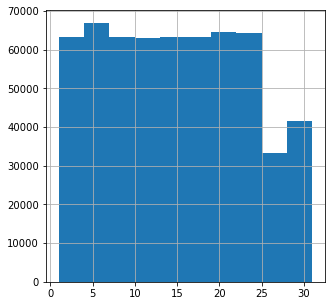

In [66]:
#Puedo ver la distribución también con un histograma
vuelos_train['DAY'].hist(figsize=(5,5));

Se puede ver que el número de vuelos diarios es estable lo que ocurre es que el dataset va del 01/01 al 25/02 por eso se ve que faltan vuelos desde el 25 al 30 (además de que febrero tiene menos dias)

### DAY_OF_WEEK

Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [67]:
vuelos_train['DAY_OF_WEEK'] = pd.to_numeric(vuelos_train['DAY_OF_WEEK'])

In [68]:
print("Valores nulos:", vuelos_train['DAY_OF_WEEK'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['DAY_OF_WEEK'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [69]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['DAY_OF_WEEK'], inplace=True) 

In [70]:
#Valores que tengo
vuelos_train ['DAY_OF_WEEK'].value_counts()

5    90841
1    90190
4    88569
2    86191
7    82384
3    77905
6    71120
Name: DAY_OF_WEEK, dtype: int64

### AIRLINE

Voy a comprobar que no haya nulos. Si los hay elimino esas observacion

In [71]:
print("Valores nulos:", vuelos_train['AIRLINE'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['AIRLINE'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [72]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['AIRLINE'], inplace=True) 

In [73]:
#Valores que tengo
vuelos_train ['AIRLINE'].value_counts()

WN    124244
DL     81784
EV     62105
OO     59879
AA     54862
UA     48627
US     41605
MQ     37305
B6     27106
AS     16545
NK     11087
F9      8280
HA      7954
VX      5817
Name: AIRLINE, dtype: int64

In [74]:
print ("Tenemos " + str(len(vuelos_train ['AIRLINE'].value_counts())) + " compañias aereas")

Tenemos 14 compañias aereas


Variable de tipo categórico

### ORIGIN_AIRPORT

Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [75]:
print("Valores nulos:", vuelos_train['ORIGIN_AIRPORT'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['ORIGIN_AIRPORT'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [76]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['ORIGIN_AIRPORT'], inplace=True) 

In [77]:
#Valores que tengo
vuelos_train ['ORIGIN_AIRPORT'].value_counts()

ATL    37165
ORD    29406
DFW    28722
LAX    21636
DEN    21271
IAH    16576
PHX    16352
SFO    15979
LAS    14528
MCO    12654
LGA    12073
DTW    12005
CLT    11530
MSP    11238
BOS    11230
EWR    11016
SLC    10798
JFK    10586
SEA    10423
FLL     9204
BWI     8606
DCA     8455
MDW     8408
MIA     8317
SAN     7497
TPA     7488
PHL     7169
DAL     6416
HOU     5751
BNA     5059
       ...  
ESC       69
CNY       68
EKO       67
GFK       67
PLN       66
PIB       66
BRD       65
PUB       65
HOB       64
LWS       63
CDC       63
APN       62
HYS       62
INL       61
STC       55
DVL       52
IAG       47
GUM       41
MMH       41
MQT       36
PBG       35
ADQ       34
ILG       28
OTH       23
BGM       21
UST       16
BGR       11
ADK        8
PPG        7
ITH        3
Name: ORIGIN_AIRPORT, Length: 315, dtype: int64

In [78]:
print ("Tenemos " + str(len(vuelos_train ['ORIGIN_AIRPORT'].value_counts())) + " diferentes aeropuertos origen")

Tenemos 315 diferentes aeropuertos origen


Son demasiadas categorias y además en las muestras de test o nuevas muestras pueden venir nuevos aeropuertos que aquí no aparezcan. Lo que voy a hacer es quedarme con los 50 más frecuentes y el resto los agrupo como "ANOTHER_AIPORT_ORG". Para las muestras de test o nuevas muestras compararé con los 50 más frecuentes de train y pondré "ANOTHER_AIPORT_ORG" caso que no coincidan

In [79]:
aeropuertos_origen_frecuentes =  (list (vuelos_train ['ORIGIN_AIRPORT'].value_counts().index [0:50]))
aeropuertos_origen_frecuentes

['ATL',
 'ORD',
 'DFW',
 'LAX',
 'DEN',
 'IAH',
 'PHX',
 'SFO',
 'LAS',
 'MCO',
 'LGA',
 'DTW',
 'CLT',
 'MSP',
 'BOS',
 'EWR',
 'SLC',
 'JFK',
 'SEA',
 'FLL',
 'BWI',
 'DCA',
 'MDW',
 'MIA',
 'SAN',
 'TPA',
 'PHL',
 'DAL',
 'HOU',
 'BNA',
 'STL',
 'HNL',
 'OAK',
 'IAD',
 'PDX',
 'MSY',
 'AUS',
 'SJC',
 'SMF',
 'MCI',
 'RSW',
 'SNA',
 'CLE',
 'RDU',
 'SAT',
 'MKE',
 'PBI',
 'SJU',
 'PIT',
 'IND']

In [80]:
vuelos_train ['ORIGIN_AIRPORT'] [~vuelos_train ['ORIGIN_AIRPORT'].isin(aeropuertos_origen_frecuentes)]='ANOTHER_AIPORT_ORG'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
vuelos_train ['ORIGIN_AIRPORT'].value_counts()

ANOTHER_AIPORT_ORG    113295
ATL                    37165
ORD                    29406
DFW                    28722
LAX                    21636
DEN                    21271
IAH                    16576
PHX                    16352
SFO                    15979
LAS                    14528
MCO                    12654
LGA                    12073
DTW                    12005
CLT                    11530
MSP                    11238
BOS                    11230
EWR                    11016
SLC                    10798
JFK                    10586
SEA                    10423
FLL                     9204
BWI                     8606
DCA                     8455
MDW                     8408
MIA                     8317
SAN                     7497
TPA                     7488
PHL                     7169
DAL                     6416
HOU                     5751
BNA                     5059
STL                     5023
HNL                     4823
OAK                     4498
IAD           

### DESTINATION_AIRPORT

Voy a comprobar que no haya nulos. Si los hay elimino esas observacion

In [82]:
print("Valores nulos:", vuelos_train['DESTINATION_AIRPORT'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['DESTINATION_AIRPORT'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [83]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['DESTINATION_AIRPORT'], inplace=True) 

In [84]:
#Valores que tengo
vuelos_train ['DESTINATION_AIRPORT'].value_counts()

ATL    37145
ORD    29465
DFW    28946
LAX    21509
DEN    21375
IAH    16758
PHX    16304
SFO    15860
LAS    14570
MCO    12606
LGA    12015
DTW    11865
CLT    11518
BOS    11220
MSP    11174
EWR    10986
SLC    10720
JFK    10648
SEA    10501
FLL     9004
BWI     8598
DCA     8439
MIA     8342
MDW     8320
SAN     7488
TPA     7439
PHL     7205
DAL     6456
HOU     5790
STL     5153
       ...  
CNY       69
MKG       69
CDC       69
SMX       67
PUB       67
ALO       65
INL       65
PIB       65
APN       63
VEL       61
HYS       60
HOB       60
ESC       60
STC       57
LWS       57
DVL       55
IAG       46
MMH       45
PBG       41
GUM       41
ADQ       38
MQT       37
ILG       29
OTH       26
BGM       23
UST       18
PPG       16
ADK       11
BGR        9
ITH        3
Name: DESTINATION_AIRPORT, Length: 315, dtype: int64

In [85]:
print ("Tenemos " + str(len(vuelos_train ['DESTINATION_AIRPORT'].value_counts())) + " diferentes aeropuertos destino")

Tenemos 315 diferentes aeropuertos destino


Son demasiadas categorias y además en las muestras de test o nuevas muestras pueden venir nuevos aeropuertos que aquí no aparezcan. Lo que voy a hacer es quedarme con los 50 más frecuentes y el resto los agrupo como "ANOTHER_AIPORT_DES". Para las muestras de test o nuevas muestras compararé con los 50 más frecuentes de train y pondré "ANOTHER_AIPORT_DES" caso que no coincidan

In [86]:
aeropuertos_destino_frecuentes =  (list (vuelos_train ['DESTINATION_AIRPORT'].value_counts().index [0:50]))
aeropuertos_destino_frecuentes

['ATL',
 'ORD',
 'DFW',
 'LAX',
 'DEN',
 'IAH',
 'PHX',
 'SFO',
 'LAS',
 'MCO',
 'LGA',
 'DTW',
 'CLT',
 'BOS',
 'MSP',
 'EWR',
 'SLC',
 'JFK',
 'SEA',
 'FLL',
 'BWI',
 'DCA',
 'MIA',
 'MDW',
 'SAN',
 'TPA',
 'PHL',
 'DAL',
 'HOU',
 'STL',
 'BNA',
 'HNL',
 'OAK',
 'PDX',
 'IAD',
 'MSY',
 'AUS',
 'SJC',
 'RSW',
 'SNA',
 'SMF',
 'MCI',
 'CLE',
 'RDU',
 'MKE',
 'SAT',
 'PBI',
 'SJU',
 'PIT',
 'CMH']

In [87]:
vuelos_train ['DESTINATION_AIRPORT'] [~vuelos_train ['DESTINATION_AIRPORT'].isin(aeropuertos_destino_frecuentes)]='ANOTHER_AIPORT_DES'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
vuelos_train ['DESTINATION_AIRPORT'].value_counts()

ANOTHER_AIPORT_DES    112982
ATL                    37145
ORD                    29465
DFW                    28946
LAX                    21509
DEN                    21375
IAH                    16758
PHX                    16304
SFO                    15860
LAS                    14570
MCO                    12606
LGA                    12015
DTW                    11865
CLT                    11518
BOS                    11220
MSP                    11174
EWR                    10986
SLC                    10720
JFK                    10648
SEA                    10501
FLL                     9004
BWI                     8598
DCA                     8439
MIA                     8342
MDW                     8320
SAN                     7488
TPA                     7439
PHL                     7205
DAL                     6456
HOU                     5790
STL                     5153
BNA                     5061
HNL                     4723
OAK                     4546
PDX           

### SCHEDULED_DEPARTURE

Voy a comprobar que no haya nulos. Si los hay elimino esas observacion

In [89]:
vuelos_train['SCHEDULED_DEPARTURE'] = pd.to_numeric(vuelos_train['SCHEDULED_DEPARTURE']) 

In [90]:
print("Valores nulos:", vuelos_train['SCHEDULED_DEPARTURE'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['SCHEDULED_DEPARTURE'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [91]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['SCHEDULED_DEPARTURE'], inplace=True) 

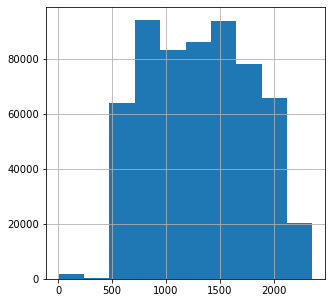

In [92]:
#Puedo ver la distribución también con un histograma
vuelos_train['SCHEDULED_DEPARTURE'].hist(figsize=(5,5));

Se puede ver que entre las 00:00 y las 05:00 apenas hay vuelos y cuando más vuelos hay es entorno a las 07:00-08:00 de la mañana. También hay un pico importante sobre las 15:00 y a partir de ahí va bajando. 

### SCHEDULED_TIME

Voy a comprobar que no haya nulos. En este caso si hay nulos lo voy a sustitur por la mediana

In [93]:
vuelos_train['SCHEDULED_TIME'] = pd.to_numeric(vuelos_train['SCHEDULED_TIME']) 
vuelos_train['SCHEDULED_TIME'] = vuelos_train['SCHEDULED_TIME'].astype(float)

In [94]:
print("Valores nulos:", vuelos_train['SCHEDULED_TIME'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['SCHEDULED_TIME'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 2
Proporcion: 0.0%


Miro la mediana y media de esta característica

In [95]:
print("Media SCHEDULED_TIME:", round(vuelos_train['SCHEDULED_TIME'].mean(),0))
print("Mediana SCHEDULED_TIME:", vuelos_train['SCHEDULED_TIME'].median())

Media SCHEDULED_TIME: 140.0
Mediana SCHEDULED_TIME: 122.0


Los 2 valores nulos los sustiuiré por la mediana 

In [96]:
mediana_scheduled_time = vuelos_train['SCHEDULED_TIME'].median() #Lo guardo para usarlo en test
vuelos_train['SCHEDULED_TIME'].fillna(vuelos_train['SCHEDULED_TIME'].median(), inplace=True)

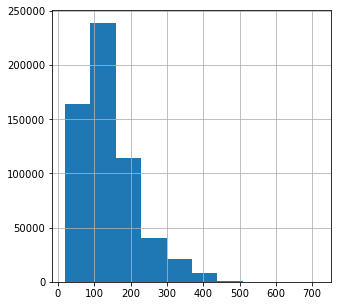

In [97]:
#Puedo ver la distribución también con un histograma
vuelos_train['SCHEDULED_TIME'].hist(figsize=(5,5));

Se ve que a mayoria de los vuelos tiene duración de 100-150 minutos

### DISTANCE

Voy a comprobar que no haya nulos. Si los hay elimino esas observacion

In [98]:
vuelos_train['DISTANCE'] = pd.to_numeric(vuelos_train['DISTANCE'])

In [99]:
print("Valores nulos:", vuelos_train['DISTANCE'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['DISTANCE'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [100]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['DISTANCE'], inplace=True) 

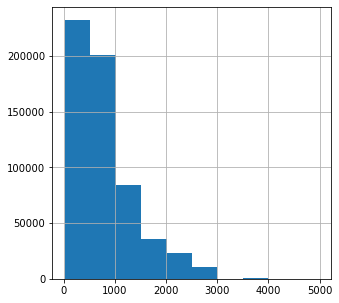

In [101]:
#Puedo ver la distribución también con un histograma
vuelos_train['DISTANCE'].hist(figsize=(5,5));

Se puede ver que la mayoría de las distancia están entre 0 y 1000 millas

### SCHEDULED_ARRIVAL

Voy a comprobar que no haya nulos. Si los hay elimino esas observacion

In [102]:
vuelos_train['SCHEDULED_ARRIVAL'] = pd.to_numeric(vuelos_train['SCHEDULED_ARRIVAL'])

In [103]:
print("Valores nulos:", vuelos_train['SCHEDULED_ARRIVAL'].isna().sum())
print(f"Proporcion: {round((vuelos_train ['SCHEDULED_ARRIVAL'].isna().sum()/len(vuelos_train))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [104]:
#Elimino nulos si los hubiera
vuelos_train.dropna(subset=['SCHEDULED_ARRIVAL'], inplace=True) 

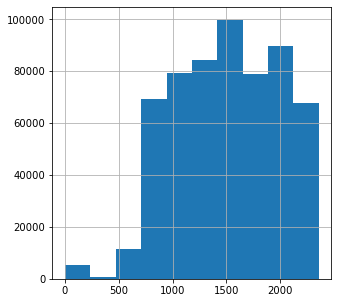

In [105]:
#Puedo ver la distribución también con un histograma
vuelos_train['SCHEDULED_ARRIVAL'].hist(figsize=(5,5));

Aquí se ve que entre las 00:00 y las 05:00 hay pocas llegadas. El mayor pico de llegas está a las 15:00 y también hay un pico importante a las 20:00

In [106]:
vuelos_train.head(5)

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2,20,5,WN,PHX,SJC,1515,110.0,621,1605
1,0,2,10,2,EV,ANOTHER_AIPORT_ORG,DFW,1220,60.0,190,1320
2,0,2,12,4,AA,MIA,DTW,1850,190.0,1145,2200
3,0,2,22,7,AS,ANOTHER_AIPORT_ORG,SEA,2010,134.0,909,2324
4,0,2,20,5,AS,ANOTHER_AIPORT_ORG,ANOTHER_AIPORT_DES,1332,104.0,571,1516


### Nueva Característica: WAIT_TIME

Analizando las columnas podría crear una nueva característica. Si tenemos la hora de salida, la de llegada y el tiempo de vuelo, la lógica nos diría que hora de salida + tiempo de vuelo = hora de llegada. Sin embargo hay diferencias tanto positivas como negativas que puede sen tiempos de espera en las puertas etc... Voy a calcuar una columna con esa diferencia. Para ello lo primero es transformar las columnas scheuled_departure y scheduled_arriva a datatime.
Si nos fijamos cuando tenemos 1515 realmente la hora es 15:15

In [107]:
def formar_hora(cadena):

        if cadena == 2400: cadena = 0
        cadena = "{0:04d}".format(int(cadena))
        hora = datetime.time(int(cadena[0:2]), int(cadena[2:4]))
        return hora

In [108]:
def calculo_tiempo_espera (t_departure, t_arrival, t_time):
    #Primero paso a datatime los datos que me llegan como t_departure y t_arrival
    t_departure_datatime = formar_hora (t_departure)
    t_arrival_datatime = formar_hora (t_arrival)
    
    #Calculo la diferencia entre ambos tiempos
    
    date = datetime.date(1, 1, 1)
    datetime1 = datetime.datetime.combine(date, t_arrival_datatime)
    datetime2 = datetime.datetime.combine(date, t_departure_datatime)
    time_elapsed = datetime1 - datetime2

    #Paso la diferencia a minutos
    segundos = time_elapsed.seconds
    dif_minutos = segundos/60
    
    #Calculo la diferencia entre el t_time (tiempo de vuelo) y dif_minutos
    
    return (dif_minutos - t_time)
   
    
    

Aplico al dataset

In [109]:
vuelos_train ['WAIT_TIME'] = vuelos_train.apply(lambda x: calculo_tiempo_espera(x.SCHEDULED_DEPARTURE, x.SCHEDULED_ARRIVAL, x.SCHEDULED_TIME), axis=1)

In [110]:
vuelos_train.head(5)

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME
0,0,2,20,5,WN,PHX,SJC,1515,110.0,621,1605,-60.0
1,0,2,10,2,EV,ANOTHER_AIPORT_ORG,DFW,1220,60.0,190,1320,0.0
2,0,2,12,4,AA,MIA,DTW,1850,190.0,1145,2200,0.0
3,0,2,22,7,AS,ANOTHER_AIPORT_ORG,SEA,2010,134.0,909,2324,60.0
4,0,2,20,5,AS,ANOTHER_AIPORT_ORG,ANOTHER_AIPORT_DES,1332,104.0,571,1516,0.0


Con esto ya tendría realizada toda la limpieza de dataset. He añadido una nueva característica y categorizado

In [111]:
#Tipos de datos y columnas que me quedan finalmente
dato = vuelos_train.dtypes
dato

CANCELLED                int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
WAIT_TIME              float64
dtype: object

In [112]:
print(f"El dataset train contiene {len(vuelos_train)} vuelos con {len(vuelos_train.columns)} características")


El dataset train contiene 587200 vuelos con 12 características


## 5.- Análisis exploratorio

## 5.1. Analisis exploratorio de variables de tipo numérico

Vamos ahora a realizar un análisis básico de los datos de tipo numérico. 

Voy a resumir toda la información posible de los datos. Me interesa saber la media, desviación estándar y quartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como outliers 

In [113]:
vuelos_train.describe()

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME
count,587200.000000,587200.000000,587200.000000,587200.000000,587200.000000,587200.000000,587200.000000,587200.000000,587200.000000
mean,0.034249,1.440215,14.454537,3.930817,1322.830760,140.148878,801.889302,1506.579024,2.764850
std,0.181868,0.496413,8.278790,1.999808,469.067253,74.650516,594.182876,484.392187,89.806186
min,0.000000,1.000000,1.000000,1.000000,5.000000,20.000000,31.000000,1.000000,-300.000000
25%,0.000000,1.000000,7.000000,2.000000,925.000000,85.000000,366.000000,1123.000000,0.000000
50%,0.000000,1.000000,14.000000,4.000000,1320.000000,122.000000,641.000000,1525.000000,0.000000
75%,0.000000,2.000000,21.000000,6.000000,1720.000000,173.000000,1045.000000,1915.000000,0.000000
max,1.000000,2.000000,31.000000,7.000000,2359.000000,718.000000,4983.000000,2359.000000,1380.000000


### CANCELLED

Es la variable objetivo y vemos que los valores son 1 y 0

### MONTH

Representa el mes y se ve que los valores son 1 y 2 con lo cual es enero y febrero. Voy a ver el número de vuelos totales y  cancelados en cada mes

In [114]:
vuelos_cancelados = vuelos_train[vuelos_train['CANCELLED']==1]

vuelos_cancelados.head()

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME
6,1,1,26,1,DL,DTW,ANOTHER_AIPORT_DES,1745,105.0,549,1930,0.0
14,1,2,1,7,OO,PHX,ANOTHER_AIPORT_DES,1700,75.0,351,1815,0.0
16,1,1,19,1,F9,DEN,ANOTHER_AIPORT_DES,2015,134.0,977,29,120.0
18,1,1,6,2,WN,MDW,DCA,535,110.0,601,825,60.0
24,1,1,22,4,US,BOS,LGA,800,79.0,184,919,0.0


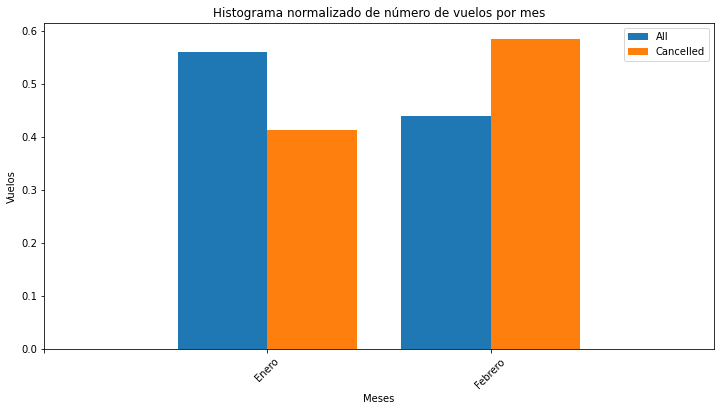

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

bins = np.arange(4) - 0.5

#Normalizo para poder ver mejor las cancelaciones
ax.hist([vuelos_train['MONTH'], vuelos_cancelados['MONTH']],  bins=bins, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,3)
ax.set_xlabel('Meses')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por mes')

ax.set_xticks(np.arange(0, 3, step=1))  
meses = [' ','Enero', 'Febrero']
ax.set_xticklabels(meses, rotation = 45)

plt.legend()
plt.show()

Se puede apreciar que aunque hay más vuelos totales en enero que en febrero, el número de cancelaciones es más alto en febrero

### DAY

Representa el dia del mes y no se aprecian valores raros, va del 1 al 7. Voy a ver el número de vuelos totales y cancelados en cada dia de la semana

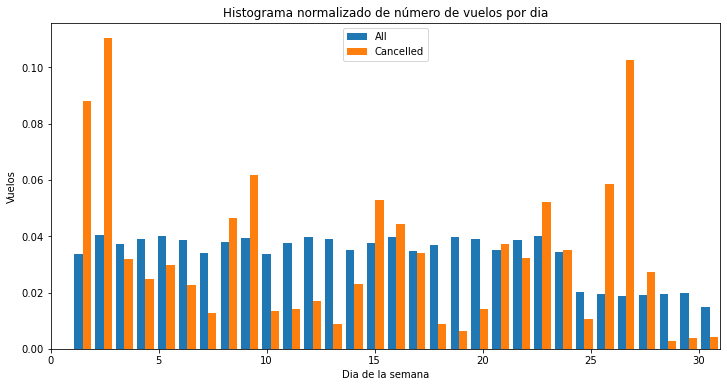

In [116]:
fig, ax = plt.subplots(figsize = (12,6))


#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['DAY'], vuelos_cancelados['DAY']], bins=31, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por dia')



plt.legend()
plt.show()

Lo que vemos es que los primeros dias del mes tienen más cancelaciones y tambíen el 26 y 27

### DAY_OF_WEEK

Representa el dia de la semana y no se aprecian valores raros, va del1 al 31. Voy a ver el número de vuelos totales y cancelados en cada dia

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


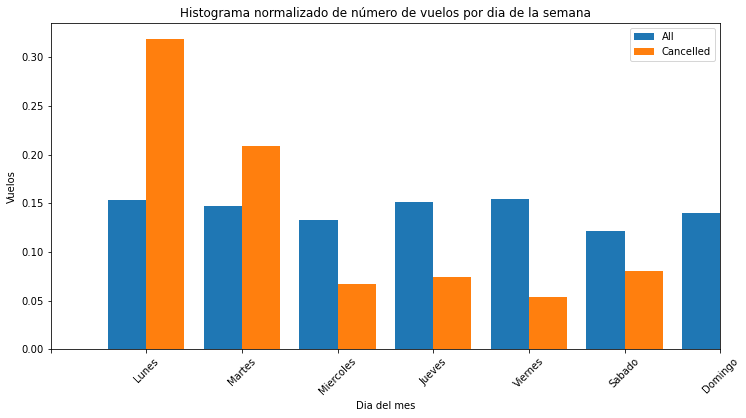

In [117]:
fig, ax = plt.subplots(figsize = (12,6))

bins = np.arange(9) - 0.5
#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['DAY_OF_WEEK'], vuelos_cancelados['DAY_OF_WEEK']], bins=bins, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,7)

ax.set_xlabel('Dia del mes')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por dia de la semana')

dias= [' ','Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
ax.set_xticklabels(dias, rotation = 45)

plt.legend()
plt.show()

Aquí se ve que los dos primeros dias de la semana son los de mayores cancelaciones, aunque el número de vuelos totales es semejante al resto de dias

### SCHEDULED_DEPARTURE

Representa la hora de partida del vuelo y no se aprecian valores raros, va desde las 00:05 a las 23:59
Voy a ver el número de vuelos totales y cancelados en cada hora


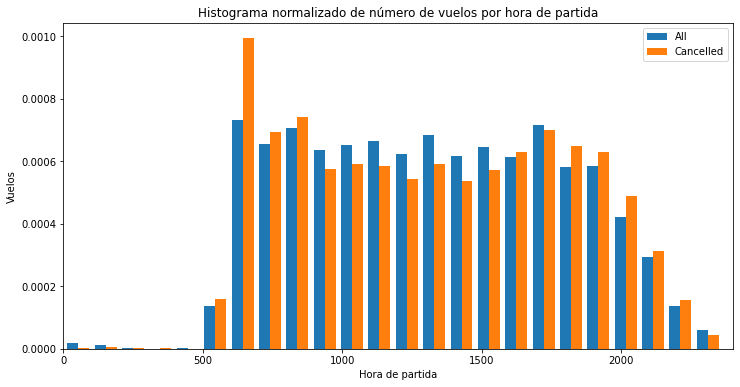

In [118]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['SCHEDULED_DEPARTURE'], vuelos_cancelados['SCHEDULED_DEPARTURE']], bins=24, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Hora de partida')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por hora de partida')



plt.legend()
plt.show()

Se ve que las primeras horas de la mañana son las que tienen más cancelaciones

### SCHEDULED_TIME

Representa el tiempo planificado para el viaje. Se ve que el mínimo son 20 minutos pero el máximo 718 minutos
. Voy a intentar localizar que vuelo es ese que necesita los 718 minutos

In [119]:
#Voy a mirar el vuelo con más tiempo programado
vuelos_train [vuelos_train.SCHEDULED_TIME == 718.0]

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME
232536,0,1,7,3,DL,JFK,HNL,845,718.0,4983,1543,-300.0
348624,0,1,3,6,DL,JFK,HNL,845,718.0,4983,1543,-300.0
407449,0,1,5,1,DL,JFK,HNL,845,718.0,4983,1543,-300.0
414682,0,1,11,7,DL,JFK,HNL,845,718.0,4983,1543,-300.0
441953,0,1,1,4,DL,JFK,HNL,845,718.0,4983,1543,-300.0
559648,0,1,6,2,DL,JFK,HNL,845,718.0,4983,1543,-300.0


In [120]:
vuelos_train [(vuelos_train.AIRLINE == 'DL') & (vuelos_train.ORIGIN_AIRPORT =='JFK') & (vuelos_train.DESTINATION_AIRPORT=='HNL') ]

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME
232536,0,1,7,3,DL,JFK,HNL,845,718.0,4983,1543,-300.0
348624,0,1,3,6,DL,JFK,HNL,845,718.0,4983,1543,-300.0
407449,0,1,5,1,DL,JFK,HNL,845,718.0,4983,1543,-300.0
414682,0,1,11,7,DL,JFK,HNL,845,718.0,4983,1543,-300.0
441953,0,1,1,4,DL,JFK,HNL,845,718.0,4983,1543,-300.0
559648,0,1,6,2,DL,JFK,HNL,845,718.0,4983,1543,-300.0


Pues parece que es el mismo vuelo en diferentes dias

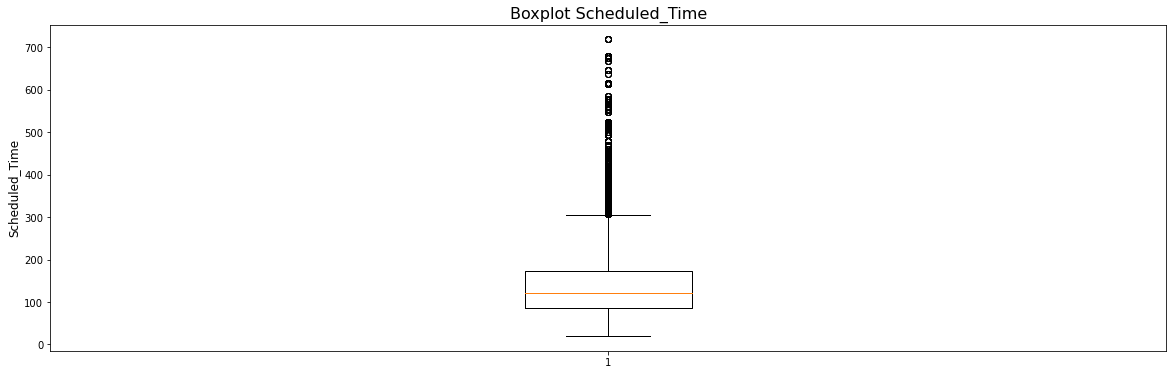

In [121]:
#Dibujo un Boxplot para ese tiempo
plt.figure(figsize=(20,6))
plt.boxplot(vuelos_train.SCHEDULED_TIME)
plt.ylabel('Scheduled_Time', fontsize=12)
plt.title('Boxplot Scheduled_Time', fontsize=16)
plt.show()

Se ve que la mayoría de vuelos están entre los 100 y 200 minutos

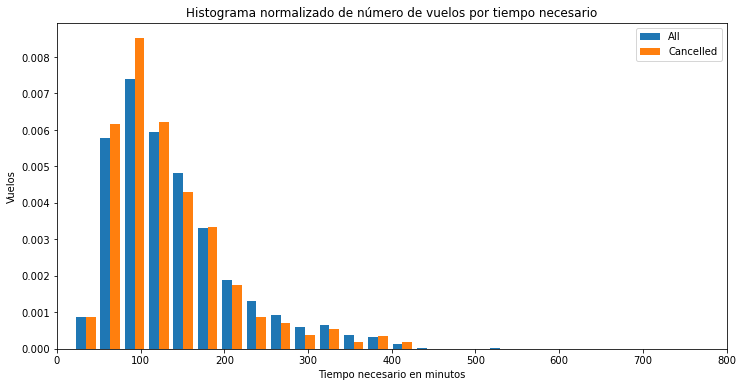

In [122]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['SCHEDULED_TIME'], vuelos_cancelados['SCHEDULED_TIME']], bins=24, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,800)

ax.set_xlabel('Tiempo necesario en minutos')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por tiempo necesario')



plt.legend()
plt.show()

Se aprecia que la mayor cancelación se da en vuelos entorno a las 100 minutos, pero es que estos son también los más numerosos

### DISTANCE

Representa la distancia entre los aeropuertos origen y destino. Veamos las cancelaciones en función de la distancia

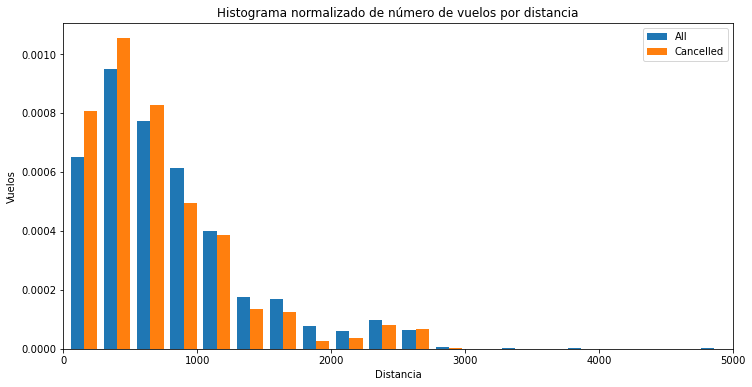

In [123]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['DISTANCE'], vuelos_cancelados['DISTANCE']], bins=20, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,5000)

ax.set_xlabel('Distancia')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por distancia')



plt.legend()
plt.show()

Se aprecia que los vuelos más cortos son los que se cancelan más

### SCHEDULED_ARRIVAL

Representa la hora de llegada del vuelo y no se aprecian valores raros, va desde las 00:051 a las 23:59
Voy a ver el número de vuelos totales y cancelados en cada hora

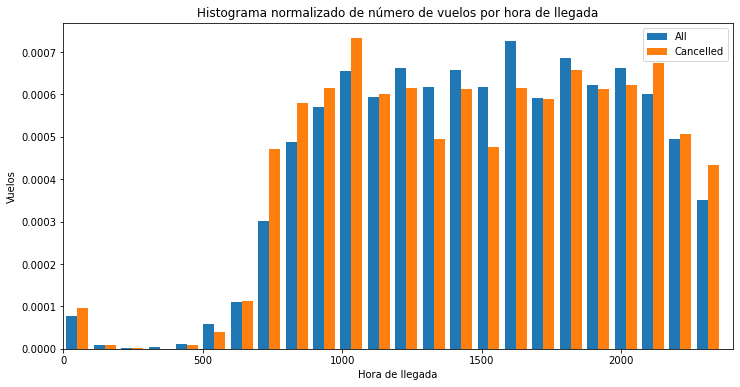

In [124]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['SCHEDULED_ARRIVAL'], vuelos_cancelados['SCHEDULED_ARRIVAL']], bins=24, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Hora de llegada')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por hora de llegada')



plt.legend()
plt.show()

Aquí se ve que los que llegan a primera hora de la mañana tienen bastantes cancelaciones y también se aprecia un pico alto entorno a las 21:00

### WAIT_TIME

Es una columna calculada que representa la diferencia entre el tiempo estimado para el viaje y la diferencia entre la hora programada de salida y llegada, es decir, son tiempos de viaje pero no del vuelo en sí

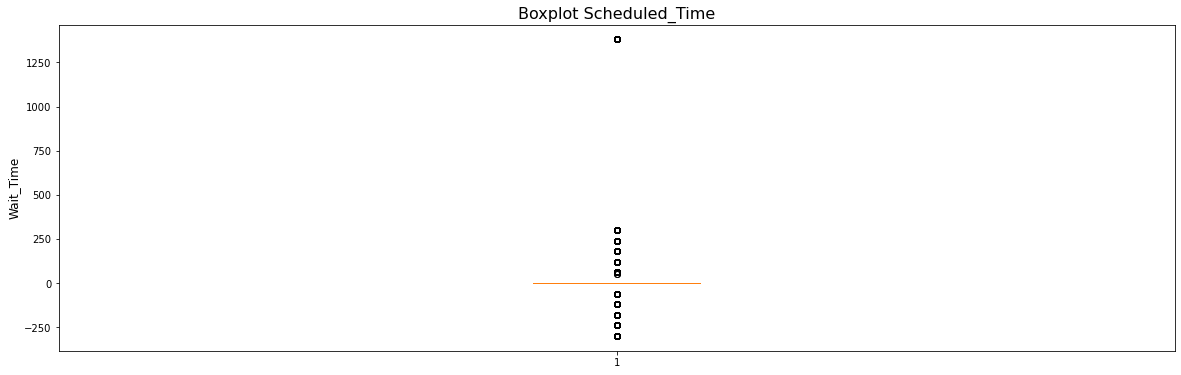

In [125]:
#Dibujo un Boxplot para ese tiempo
plt.figure(figsize=(20,6))
plt.boxplot(vuelos_train.WAIT_TIME)
plt.ylabel('Wait_Time', fontsize=12)
plt.title('Boxplot Scheduled_Time', fontsize=16)
plt.show()

Aquí se ve que lo normal es que no haya diferencia por eso está todo muy concentrado en 0

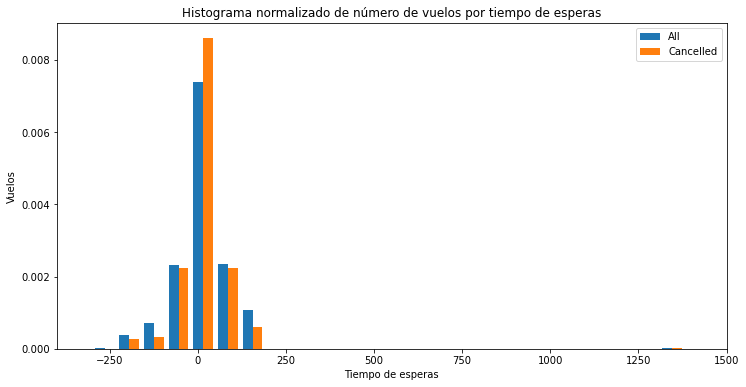

In [126]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['WAIT_TIME'], vuelos_cancelados['WAIT_TIME']], bins=24, density=1, label=['All', 'Cancelled'])

ax.set_xlim(-400,1500)

ax.set_xlabel('Tiempo de esperas')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por tiempo de esperas')



plt.legend()
plt.show()

Aquí se ve que lo normal es que no haya diferencia por eso está todo muy concentrado en 0. Podríamos en un intento de mejora del modelo quedarnos solo con aquellos vuelos en los que la diferencia sea 0 o 1 hora y considerar los demás como outliers.....

##  5.2. Analisis exploratorio de variables de tipo categórico

### AIRLINE

Analizo los vuelos por aerolínea

In [127]:
aerolineas_df = pd.DataFrame(vuelos_train.groupby('AIRLINE').size())
aerolineas_df.rename(columns={0: 'number_of_flights'}, inplace=True)
#Ordeno de mayor a menor 
aerolineas_df.sort_values('number_of_flights', ascending=False)

,number_of_flights
AIRLINE,
WN,124244
DL,81784
EV,62105
OO,59879
AA,54862
UA,48627
US,41605
MQ,37305
B6,27106


Podemos ver que la aerolínea WN es la que tiene más vuelos

Veamos ahora los vuelos cancelados por aerolínea

In [128]:
aerolineas_canc_df = pd.DataFrame(vuelos_cancelados.groupby('AIRLINE').size())
aerolineas_canc_df.rename(columns={0: 'number_of_cancels'}, inplace=True)
#Ordeno de mayor a menor 
aerolineas_canc_df.sort_values('number_of_cancels', ascending=False)

,number_of_cancels
AIRLINE,
MQ,3633
WN,3419
EV,2967
AA,1803
OO,1716
B6,1670
US,1565
UA,1394
DL,1303


En este caso vemos que la que más cancelaciones tiene es MQ que es la octava en número de vuelos

Represento el histograma normalizado

In [129]:
n_aerolineas  = len(vuelos_train['AIRLINE'].groupby(vuelos_train['AIRLINE']))

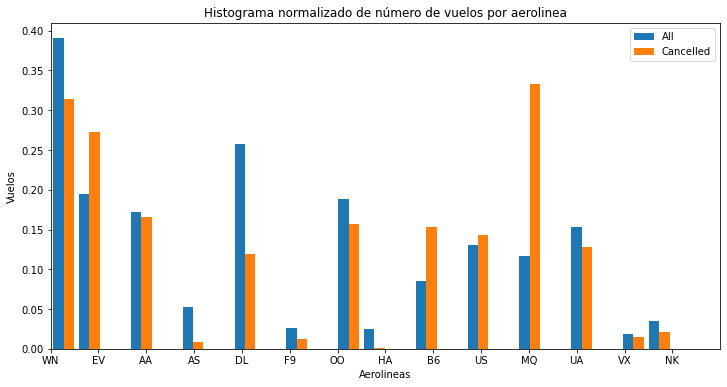

In [130]:
fig, ax = plt.subplots(figsize = (12,6))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['AIRLINE'], vuelos_cancelados['AIRLINE']], bins=24, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,n_aerolineas)

ax.set_xlabel('Aerolineas')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por aerolinea')




plt.legend()
plt.show()

En la grafica se ve como destaca las cancelaciones de MQ que no es de las que más vuelos tiene

### ORIGIN_AIRPORT

Analizo los vuelos por aeropuerto origen

In [131]:
origin_df = pd.DataFrame(vuelos_train.groupby('ORIGIN_AIRPORT').size())
origin_df.rename(columns={0: 'number_of_flights'}, inplace=True)
#Ordeno de mayor a menor 
origin_df.sort_values('number_of_flights', ascending=False)

,number_of_flights
ORIGIN_AIRPORT,
ANOTHER_AIPORT_ORG,113295
ATL,37165
ORD,29406
DFW,28722
LAX,21636
DEN,21271
IAH,16576
PHX,16352
SFO,15979


El aeropuerto de partida con más vuelos es ATL

Veamos ahora los vuelos cancelados por aeropuerto de origen

In [132]:
origin_canc_df = pd.DataFrame(vuelos_cancelados.groupby('ORIGIN_AIRPORT').size())
origin_canc_df.rename(columns={0: 'number_of_cancels'}, inplace=True)
#Ordeno de mayor a menor 
origin_canc_df.sort_values('number_of_cancels', ascending=False)

,number_of_cancels
ORIGIN_AIRPORT,
ANOTHER_AIPORT_ORG,4550
ORD,1860
LGA,1314
BOS,1212
DFW,1095
EWR,858
JFK,662
DCA,597
ATL,559


El de más cancelacines es ORD que también es el segundo en vuelos, quizás más llamativo sea LGA que es el segundo en cancelaciones pero en vuelos es el 11

In [133]:
n_origin  = len(vuelos_train['ORIGIN_AIRPORT'].groupby(vuelos_train['ORIGIN_AIRPORT']))

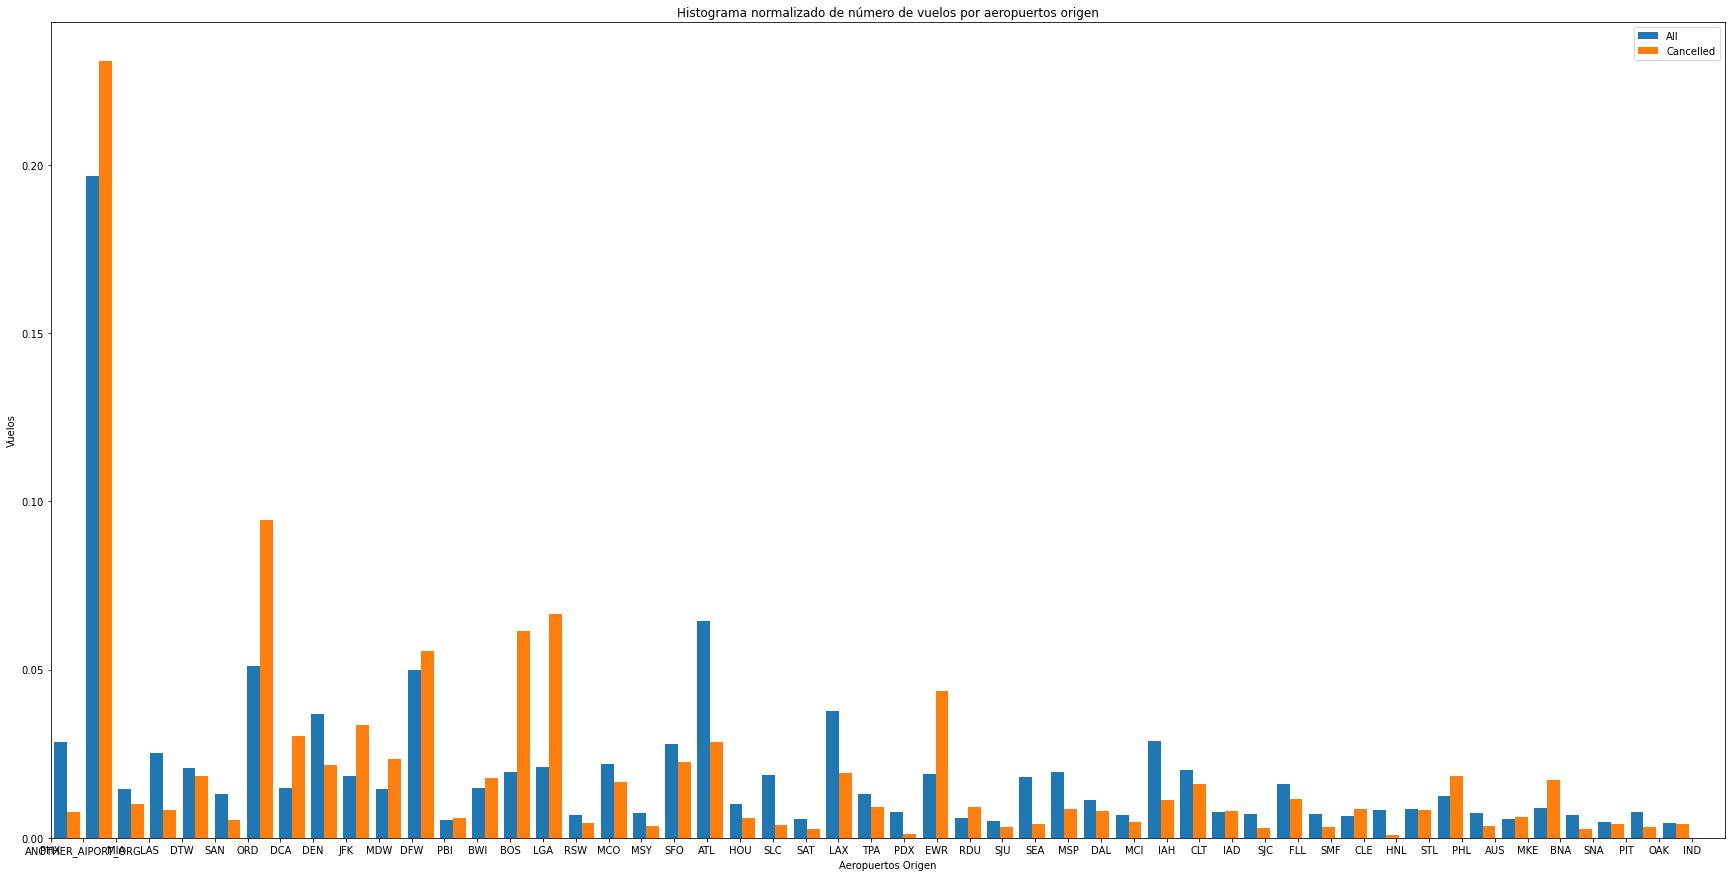

In [134]:
fig, ax = plt.subplots(figsize = (30,15))



#Normalizo para ver mejor las cancelaciones
ax.hist([vuelos_train['ORIGIN_AIRPORT'], vuelos_cancelados['ORIGIN_AIRPORT']], bins=51, density=1, label=['All', 'Cancelled'])

ax.set_xlim(0,n_origin)

ax.set_xlabel('Aeropuertos Origen')
ax.set_ylabel('Vuelos')
ax.set_title('Histograma normalizado de número de vuelos por aeropuertos origen')




plt.legend()
plt.show()


### DESTINATION_AIRPORT

Analizo los vuelos por aeropuerto de destino

In [135]:
destin_df = pd.DataFrame(vuelos_train.groupby('DESTINATION_AIRPORT').size())
destin_df.rename(columns={0: 'number_of_flights'}, inplace=True)
#Ordeno de mayor a menor 
destin_df.sort_values('number_of_flights', ascending=False)

,number_of_flights
DESTINATION_AIRPORT,
ANOTHER_AIPORT_DES,112982
ATL,37145
ORD,29465
DFW,28946
LAX,21509
DEN,21375
IAH,16758
PHX,16304
SFO,15860


ATL es el aerpuerto con más llegadas, era también el de más salidas

Veamos ahora los vuelos cancelados por aeropuerto de destino

In [136]:
destin_canc_df = pd.DataFrame(vuelos_cancelados.groupby('DESTINATION_AIRPORT').size())
destin_canc_df.rename(columns={0: 'number_of_cancels'}, inplace=True)
#Ordeno de mayor a menor 
destin_canc_df.sort_values('number_of_cancels', ascending=False)

,number_of_cancels
DESTINATION_AIRPORT,
ANOTHER_AIPORT_DES,4017
ORD,1948
LGA,1268
DFW,1239
BOS,1238
EWR,920
JFK,677
ATL,655
DCA,548


Los dos primeros vuelven a ser ORD y LGA. Vuelve a destacar LGA que sin embargo en número de vuelos no es de los primeros.
Parece claro que en LGA ocurrió algo ya que tanto los vuelos de origen ese aeropuerto como de destino sufrieron cancelaciones

## 6.- Preparación de datos para el modelado

## 6.1.- Codificación de variables categóricas

Tenemos varias variables categóricas que hay que codificar para el modelado. Utilizo el método get_dummies que se puede aplicar directamente sobre el dataframe

In [137]:
transformed_vuelos_train_df = pd.get_dummies(vuelos_train)
pd.set_option('display.max_columns', len(transformed_vuelos_train_df)) # Para ver todas las columnas
transformed_vuelos_train_df.head()

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WAIT_TIME,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ANOTHER_AIPORT_ORG,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_MKE,ORIGIN_AIRPORT_MSP,ORIGIN_AIRPORT_MSY,ORIGIN_AIRPORT_OAK,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_PBI,ORIGIN_AIRPORT_PDX,ORIGIN_AIRPORT_PHL,ORIGIN_AIRPORT_PHX,ORIGIN_AIRPORT_PIT,ORIGIN_AIRPORT_RDU,ORIGIN_AIRPORT_RSW,ORIGIN_AIRPORT_SAN,ORIGIN_AIRPORT_SAT,ORIGIN_AIRPORT_SEA,ORIGIN_AIRPORT_SFO,ORIGIN_AIRPORT_SJC,ORIGIN_AIRPORT_SJU,ORIGIN_AIRPORT_SLC,ORIGIN_AIRPORT_SMF,ORIGIN_AIRPORT_SNA,ORIGIN_AIRPORT_STL,ORIGIN_AIRPORT_TPA,DESTINATION_AIRPORT_ANOTHER_AIPORT_DES,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_AUS,DESTINATION_AIRPORT_BNA,DESTINATION_AIRPORT_BOS,DESTINATION_AIRPORT_BWI,DESTINATION_AIRPORT_CLE,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_CMH,DESTINATION_AIRPORT_DAL,DESTINATION_AIRPORT_DCA,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_DTW,DESTINATION_AIRPORT_EWR,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_HNL,DESTINATION_AIRPORT_HOU,DESTINATION_AIRPORT_IAD,DESTINATION_AIRPORT_IAH,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCI,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_MDW,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_MKE,DESTINATION_AIRPORT_MSP,DESTINATION_AIRPORT_MSY,DESTINATION_AIRPORT_OAK,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_PBI,DESTINATION_AIRPORT_PDX,DESTINATION_AIRPORT_PHL,DESTINATION_AIRPORT_PHX,DESTINATION_AIRPORT_PIT,DESTINATION_AIRPORT_RDU,DESTINATION_AIRPORT_RSW,DESTINATION_AIRPORT_SAN,DESTINATION_AIRPORT_SAT,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SJU,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA
0,0,2,20,5,1515,110.0,621,1605,-60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,2,10,2,1220,60.0,190,1320,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,12,4,1850,190.0,1145,2200,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,22,7,2010,134.0,909,2324,60.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2,20,5,1332,104.0,571,1516,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6.2. Análsis de correlación
El siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. Las altamente correladas se podrían eliminar

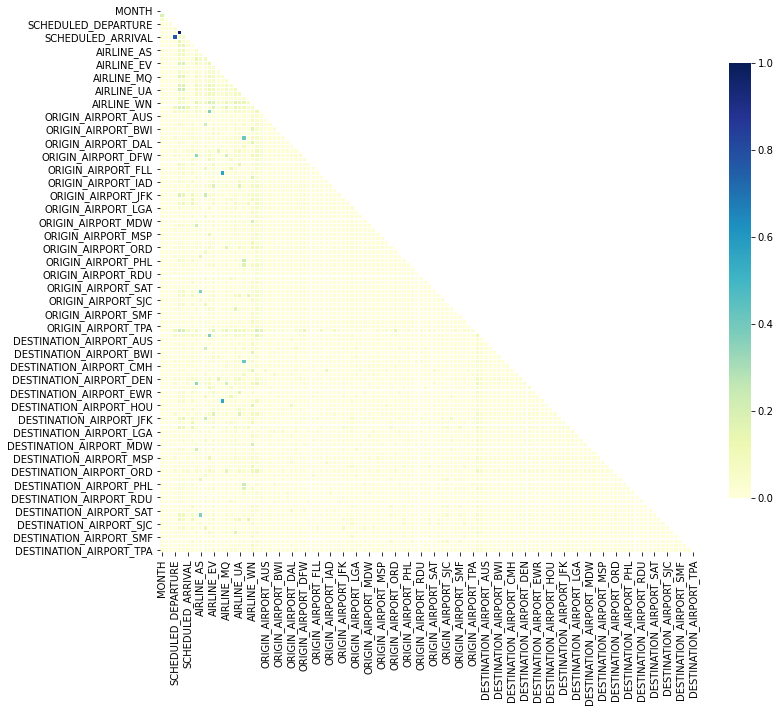

In [138]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(transformed_vuelos_train_df.drop(['CANCELLED'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No parece haber una ninguna correlación relevante con los aerupuertos así que temporalmente los voy a quitar para poder ver el mapa anterior más claro

In [139]:
transformed_vuelos_train_df_sinaeropuertos = transformed_vuelos_train_df.drop(list(transformed_vuelos_train_df.columns[transformed_vuelos_train_df.columns.str.startswith('ORIGIN_')]), axis=1)

In [140]:
transformed_vuelos_train_df_sinaeropuertos = transformed_vuelos_train_df_sinaeropuertos.drop(list(transformed_vuelos_train_df_sinaeropuertos.columns[transformed_vuelos_train_df_sinaeropuertos.columns.str.startswith('DESTINATION_')]), axis=1)

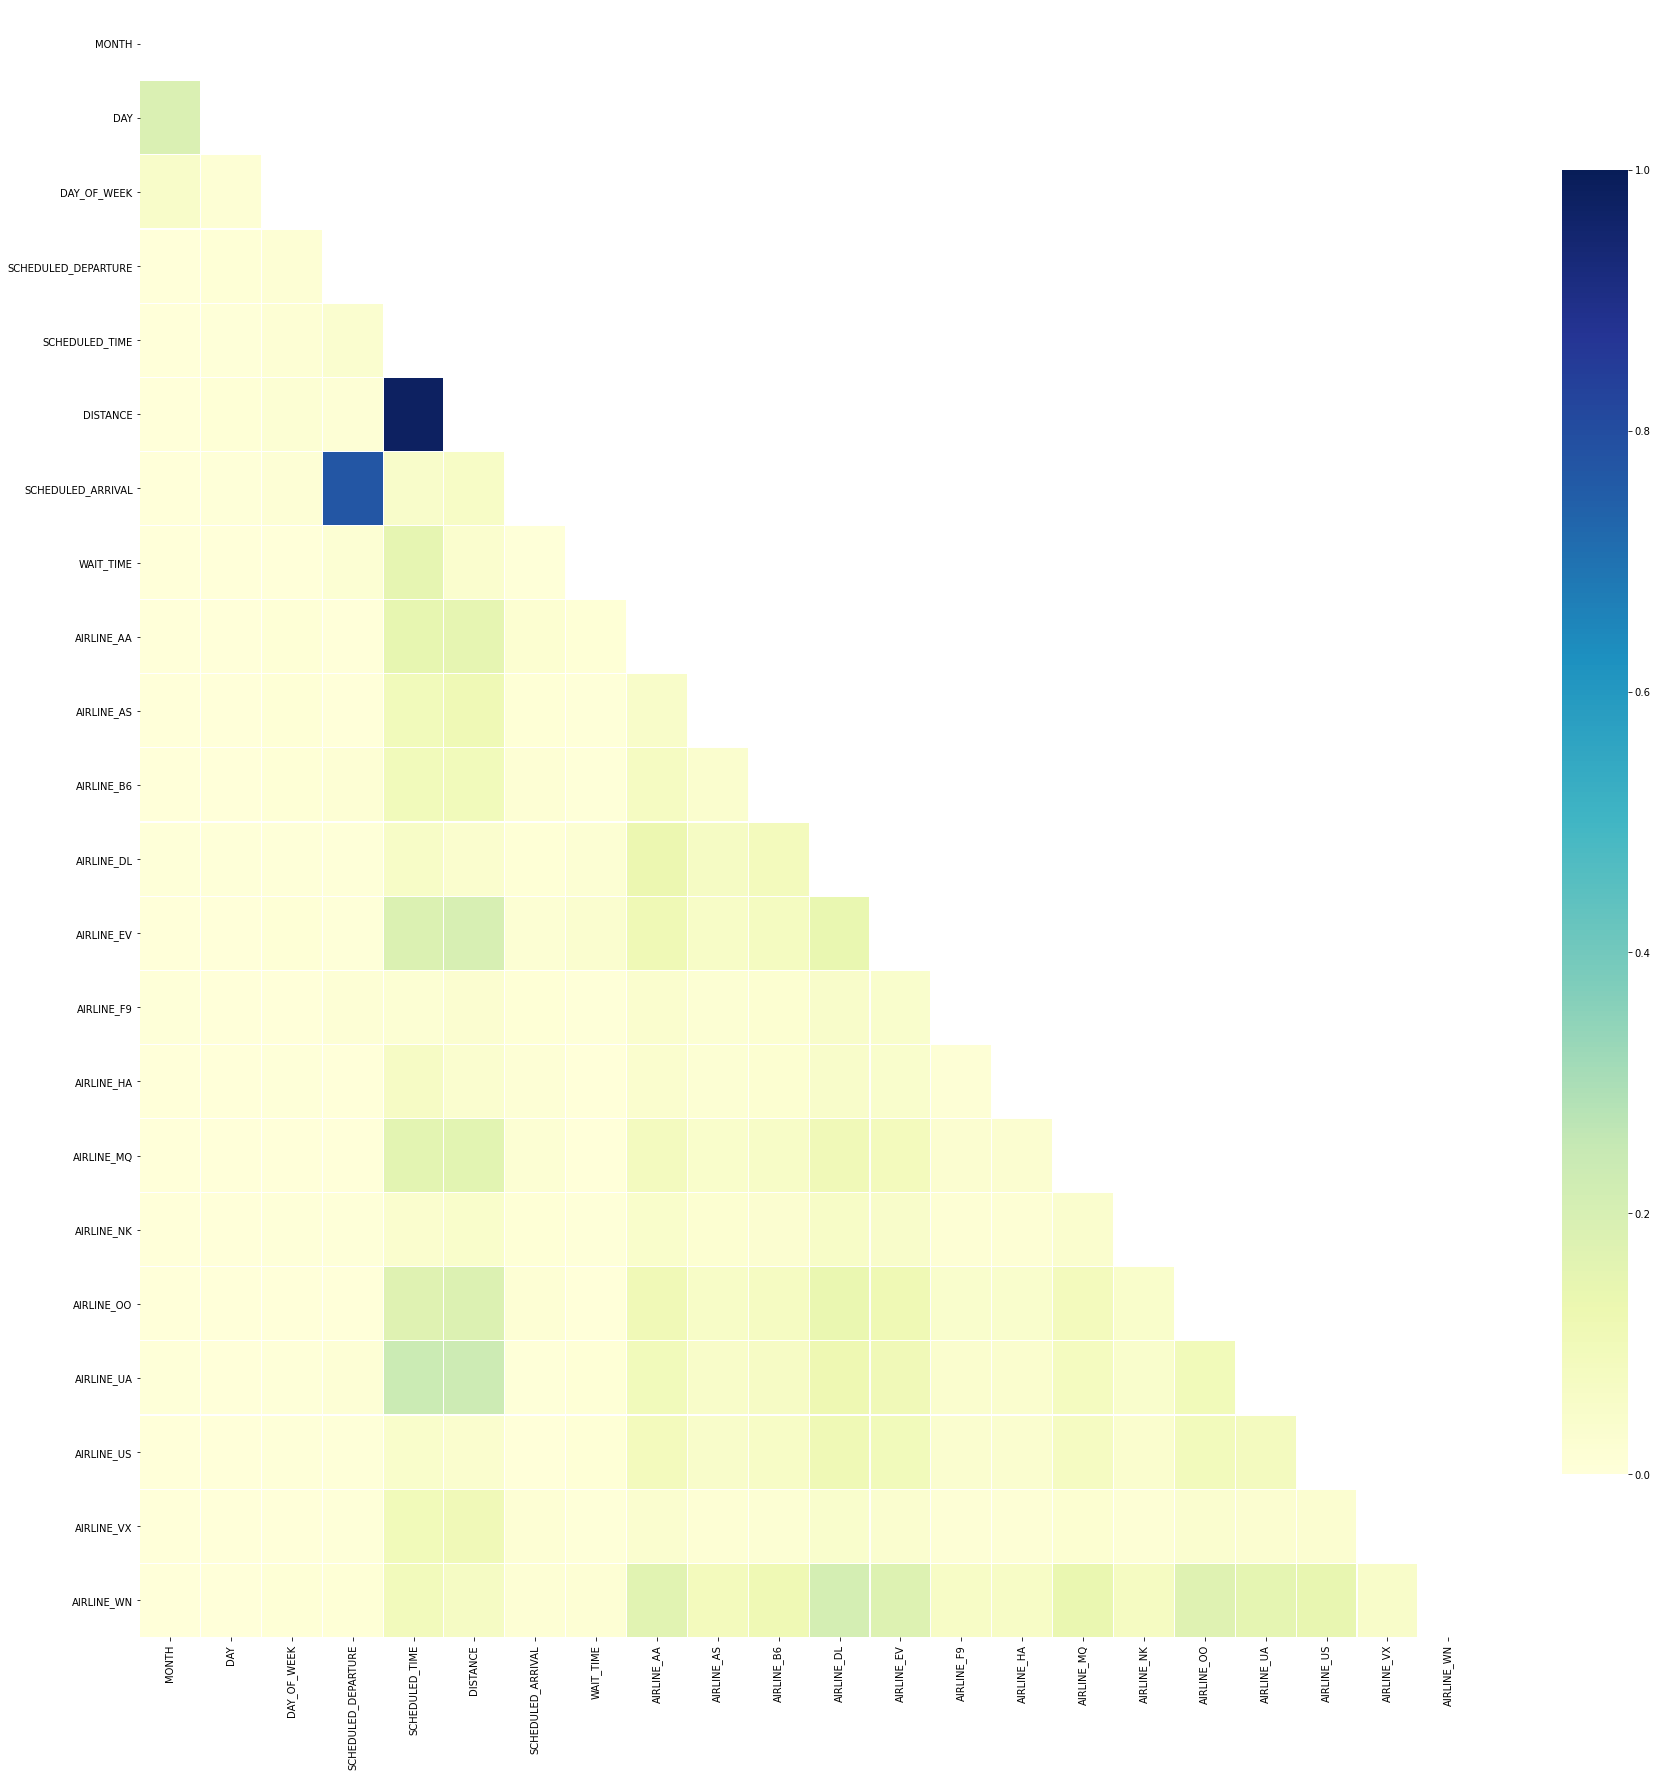

In [141]:
# Compute the correlation matrix
corr = np.abs(transformed_vuelos_train_df_sinaeropuertos.drop(['CANCELLED'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se ve una alta correlación entre DISTANCE y SCHEDULED_TIME por lo que voy a eliminar una de ellas, en concreto SCHEDULED_TIME. También hay una alta correlación entre SCHEDULED_DEPARTURE y SCHEDULED_ARRIVAL. Puedo eliminar también una de ellas, por ejemplo SCHEDULED_ARRIVAL


In [142]:
to_drop = ['SCHEDULED_TIME', 'SCHEDULED_ARRIVAL']

In [143]:
transformed_vuelos_train_df.drop(to_drop, axis=1, inplace=True)

In [144]:
transformed_vuelos_train_df.head(5)

,CANCELLED,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DISTANCE,WAIT_TIME,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ANOTHER_AIPORT_ORG,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_MKE,ORIGIN_AIRPORT_MSP,ORIGIN_AIRPORT_MSY,ORIGIN_AIRPORT_OAK,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_PBI,ORIGIN_AIRPORT_PDX,ORIGIN_AIRPORT_PHL,ORIGIN_AIRPORT_PHX,ORIGIN_AIRPORT_PIT,ORIGIN_AIRPORT_RDU,ORIGIN_AIRPORT_RSW,ORIGIN_AIRPORT_SAN,ORIGIN_AIRPORT_SAT,ORIGIN_AIRPORT_SEA,ORIGIN_AIRPORT_SFO,ORIGIN_AIRPORT_SJC,ORIGIN_AIRPORT_SJU,ORIGIN_AIRPORT_SLC,ORIGIN_AIRPORT_SMF,ORIGIN_AIRPORT_SNA,ORIGIN_AIRPORT_STL,ORIGIN_AIRPORT_TPA,DESTINATION_AIRPORT_ANOTHER_AIPORT_DES,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_AUS,DESTINATION_AIRPORT_BNA,DESTINATION_AIRPORT_BOS,DESTINATION_AIRPORT_BWI,DESTINATION_AIRPORT_CLE,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_CMH,DESTINATION_AIRPORT_DAL,DESTINATION_AIRPORT_DCA,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_DTW,DESTINATION_AIRPORT_EWR,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_HNL,DESTINATION_AIRPORT_HOU,DESTINATION_AIRPORT_IAD,DESTINATION_AIRPORT_IAH,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCI,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_MDW,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_MKE,DESTINATION_AIRPORT_MSP,DESTINATION_AIRPORT_MSY,DESTINATION_AIRPORT_OAK,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_PBI,DESTINATION_AIRPORT_PDX,DESTINATION_AIRPORT_PHL,DESTINATION_AIRPORT_PHX,DESTINATION_AIRPORT_PIT,DESTINATION_AIRPORT_RDU,DESTINATION_AIRPORT_RSW,DESTINATION_AIRPORT_SAN,DESTINATION_AIRPORT_SAT,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SJU,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA
0,0,2,20,5,1515,621,-60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,2,10,2,1220,190,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,12,4,1850,1145,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,22,7,2010,909,60.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2,20,5,1332,571,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6.3. Estandarización y Normalización
Voy a representar el histograma de las variables numéricas para ver si a algunas de ellas se les podría aplicar alguna transformación logarítmica

In [145]:
numerical_columns = ['CANCELLED', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
                    'DISTANCE', 'WAIT_TIME']

C:\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

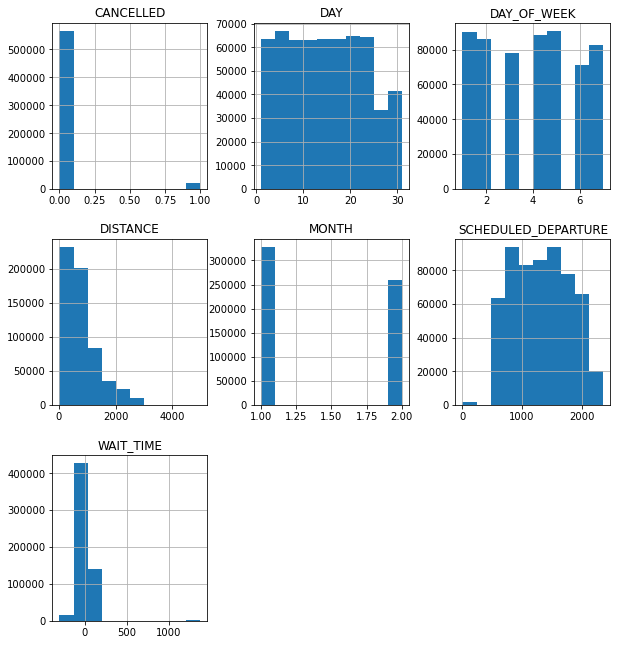

In [146]:
transformed_vuelos_train_df[numerical_columns].hist(figsize=(10,11));

Hay algunas variables que están desplazadas hacia los márgenes. Voy a comprobar si alguna se podría beneficiar de una transformación logarítmica

In [147]:
transformed_vuelos_train_df_log = transformed_vuelos_train_df.copy()

In [148]:
# Transformación logarítmica de columnas

for col in numerical_columns:
    transformed_vuelos_train_df_log[col] = transformed_vuelos_train_df_log[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_vuelos_train_df_log[col] = np.log(transformed_vuelos_train_df_log[col])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


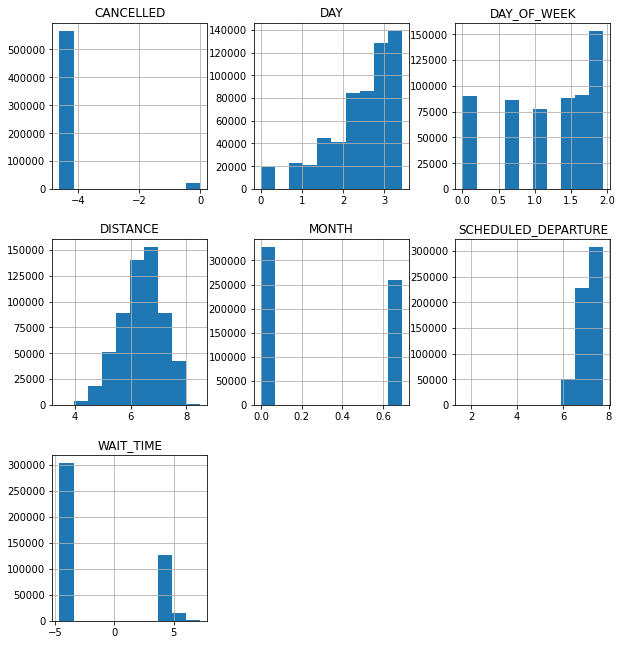

In [149]:
transformed_vuelos_train_df_log[numerical_columns].hist(figsize=(10,11));

Parece que la única que se beneficiaría de esta transformación es Distance, así que se lo voy a aplicar la transformación logarítmica solo a esa variable

In [150]:
transformed_vuelos_train_df ['DISTANCE'] = transformed_vuelos_train_df ['DISTANCE'].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
transformed_vuelos_train_df ['DISTANCE'] = np.log(transformed_vuelos_train_df ['DISTANCE'])

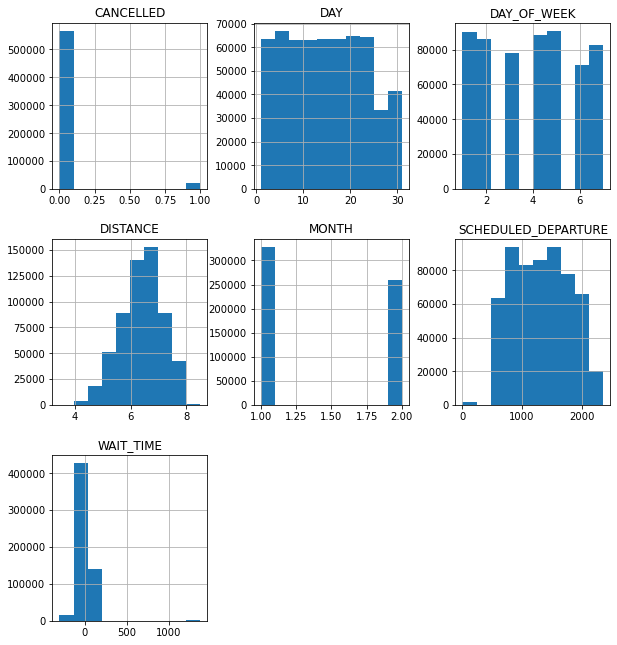

In [151]:
transformed_vuelos_train_df[numerical_columns].hist(figsize=(10,11));

In [122]:
#Guardo el transformed_vuelos_train_df resultante
path_df = './data/vuelos_train.csv'
fvuelos_train = transformed_vuelos_train_df.to_csv(path_df, header=True)

## 6.4. Aplicar todas las transformaciones a las muestra de test

Antes de comenzar con el modelado tengo que coger las muestras de test que aparté en un principio y aplicarle todas las transformaciones que se le han hecho a las muestras de train

In [123]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_test = pd.DataFrame(datos_test)

#Añado el nombre de las columnas
datos_test.columns = feature_names

cancela_df = pd.DataFrame(cancela_test)
cancela_df.columns = ['CANCELLED']

#Uno los dos dataframe para seguir con el analisis
vuelos_test = pd.concat([cancela_df, datos_test], axis=1)

In [124]:
vuelos_test.head (5)

,CANCELLED,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,1,4,7,WN,297,N456WN,AUS,ELP,855,100,528,935
1,0,2015,1,17,6,DL,1772,N686DA,ATL,PHX,1103,262,1587,1325
2,0,2015,1,15,4,US,782,N150UW,LAX,PHL,2215,293,2402,608
3,0,2015,2,9,1,AS,201,N793AS,SJC,SEA,1730,122,697,1932
4,1,2015,2,15,7,DL,490,N346NB,JFK,MSY,1359,223,1182,1642


Aplico a las muestras de test las mimas transformaciones que he aplicado a las de train sin mirar los datos

In [125]:
caracteristicas_para_borrar = ['FLIGHT_NUMBER','TAIL_NUMBER']
vuelos_test.drop (caracteristicas_para_borrar, axis=1, inplace=True)


vuelos_test['CANCELLED'] = pd.to_numeric(vuelos_test['CANCELLED']) 
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['CANCELLED'], inplace=True) 


vuelos_test['YEAR'] = pd.to_numeric(vuelos_test['YEAR'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['YEAR'], inplace=True) 
vuelos_test.drop (['YEAR'], axis=1, inplace=True)

vuelos_test['MONTH'] = pd.to_numeric(vuelos_test['MONTH'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['MONTH'], inplace=True) 


vuelos_test['DAY'] = pd.to_numeric(vuelos_test['DAY'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['DAY'], inplace=True) 


vuelos_test['DAY_OF_WEEK'] = pd.to_numeric(vuelos_test['DAY_OF_WEEK'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['DAY_OF_WEEK'], inplace=True) 

#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['AIRLINE'], inplace=True) 

#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['ORIGIN_AIRPORT'], inplace=True) 
vuelos_test ['ORIGIN_AIRPORT'] [~vuelos_test ['ORIGIN_AIRPORT'].isin(aeropuertos_origen_frecuentes)]='ANOTHER_AIPORT_ORG'

#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['DESTINATION_AIRPORT'], inplace=True)
vuelos_test ['DESTINATION_AIRPORT'] [~vuelos_test ['DESTINATION_AIRPORT'].isin(aeropuertos_destino_frecuentes)]='ANOTHER_AIPORT_DES'

vuelos_test['SCHEDULED_DEPARTURE'] = pd.to_numeric(vuelos_test['SCHEDULED_DEPARTURE']) 
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['SCHEDULED_DEPARTURE'], inplace=True) 


vuelos_test['SCHEDULED_TIME'] = pd.to_numeric(vuelos_test['SCHEDULED_TIME']) 
vuelos_test['SCHEDULED_TIME'] = vuelos_test['SCHEDULED_TIME'].astype(float)

vuelos_test['SCHEDULED_TIME'].fillna(mediana_scheduled_time, inplace=True)

vuelos_test['DISTANCE'] = pd.to_numeric(vuelos_test['DISTANCE'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['DISTANCE'], inplace=True) 


vuelos_test['SCHEDULED_ARRIVAL'] = pd.to_numeric(vuelos_test['SCHEDULED_ARRIVAL'])
#Elimino nulos si los hubiera
vuelos_test.dropna(subset=['SCHEDULED_ARRIVAL'], inplace=True) 

vuelos_test ['WAIT_TIME'] = vuelos_test.apply(lambda x: calculo_tiempo_espera(x.SCHEDULED_DEPARTURE, x.SCHEDULED_ARRIVAL, x.SCHEDULED_TIME), axis=1)


#Codificación de variable categóricas
transformed_vuelos_test_df = pd.get_dummies(vuelos_test)

#Correlaciones
to_drop = ['SCHEDULED_TIME', 'SCHEDULED_ARRIVAL']
transformed_vuelos_test_df.drop(to_drop, axis=1, inplace=True)


#Transformación logarítmica

transformed_vuelos_test_df ['DISTANCE'] = transformed_vuelos_test_df ['DISTANCE'].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
transformed_vuelos_test_df ['DISTANCE'] = np.log(transformed_vuelos_test_df ['DISTANCE'])





C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
#Guardo el transformed_amazon_test resultante
path_df = './data/vuelos_test.csv'
fvuelos_test = transformed_vuelos_test_df.to_csv(path_df, header=True)

## 6.5. Separación X, y. Normalización

Leo los datos para train

In [2]:
vuelos_train = pd.read_csv('./data/vuelos_train.csv', sep =',') # cargamos fichero
print(f"El dataset original contiene {len(vuelos_train)} rewiews con {len(vuelos_train.columns)} características")
vuelos_train.head(3)

El dataset original contiene 587200 rewiews con 124 características


,Unnamed: 0,CANCELLED,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DISTANCE,WAIT_TIME,AIRLINE_AA,AIRLINE_AS,...,DESTINATION_AIRPORT_SAT,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SJU,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA
0,0,0,2,20,5,1515,6.431331,-60.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,2,10,2,1220,5.247024,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,12,4,1850,7.043160,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
vuelos_train.drop(vuelos_train.columns[vuelos_train.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

Leo los datos para test

In [4]:
vuelos_test = pd.read_csv('./data/vuelos_test.csv', sep =',') # cargamos fichero
print(f"El dataset original contiene {len(vuelos_test)} rewiews con {len(vuelos_test.columns)} características")
vuelos_test.head(3)

El dataset original contiene 251658 rewiews con 124 características


,Unnamed: 0,CANCELLED,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DISTANCE,WAIT_TIME,AIRLINE_AA,AIRLINE_AS,...,DESTINATION_AIRPORT_SAT,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SJU,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA
0,0,0,1,4,7,855,6.269096,-60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,17,6,1103,7.369601,-120.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,15,4,2215,7.784057,180.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
vuelos_test.drop(vuelos_test.columns[vuelos_test.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

Al haber dividido en train y test antes de cualquier procesado y haber realizado la conversión de variables categóricas con el metodo dumy podría ocurrir que tenga diferente número de características en un conjunto y en otro. Voya asegurarme que tengo en los dos lo mismo y que las características están ordenadas de la misma manera:

In [6]:
missing_cols = set (vuelos_train.columns) - set (vuelos_test.columns)
#Caso de que que en test no tenga las mismas columnas las añado con valor 0
for c in missing_cols:
    amazon_test [c]=0
#Me aseguro que el orden de las columnas en test sea el mismo que en train
vuelos_test = vuelos_test[vuelos_train.columns]

Normalizamos train

In [7]:
# Separamos X and y
X_train = vuelos_train.drop('CANCELLED', axis=1)
y_train = vuelos_train.CANCELLED

# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))

Normalizamos test

In [8]:
# Separamos X and y
X_test = vuelos_test.drop('CANCELLED', axis=1)
y_test = vuelos_test.CANCELLED

#Me quedo con el nombre de las columnas de test
feature_names_test = X_test.columns[0:]

# debo aplicar el mismo scaling al conjungo de test que el calculado para train
X_test = scaler.transform(X_test)

#Vuelvo a transformar a Dataframe
X_test = pd.DataFrame(X_test)
#Añado el nombre de las columnas que he guardado antes
X_test.columns = feature_names_test

## 7.- Modelado con algoritmos de Machine Learning

Una vez terminado el procesamiento de los datos vamos a aplicar diferentes modelos "Supervised Machine Learning" y los compararemos entre si. Hay que tener en cuenta también el tema del dataset balanceado. Voy a comenzar creándome un modelo base de regresión logística que intentaré ir mejorando

## 7.1.- Regresión Logística

Pruebo con un algoritmo de regresión logística sobre el dataset NO balanceado. Utilizo GridSearch para encontrar el mejor valor de C

best mean cross-validation score: 0.614
best parameters: {'C': 1}
test-set score: 0.62


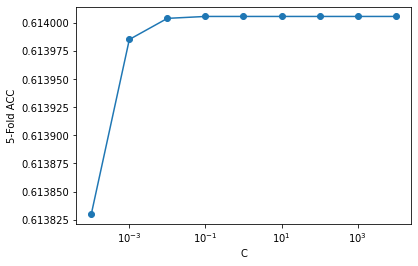

In [138]:
vectorC = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

In [139]:
#Realizo el entrenamiento con el valor C
C_optimo = grid.best_params_['C']
lr = LogisticRegression(C = C_optimo).fit(X_train,y_train)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score acc test: {:.2f}".format(lr.score(X_test, y_test)))

Training set score acc train: 0.97
Test set score acc test: 0.97


Aparentemente el resultado es bueno pero veamos la matriz de confusión

In [18]:
#Función para representar la matriz de confusión
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [141]:
y_pred = lr.predict (X_test)
y_test = np.array(list(y_test))

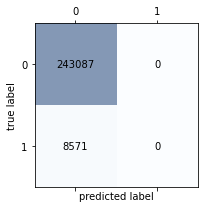

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    243087
           1       0.00      0.00      0.00      8571

    accuracy                           0.97    251658
   macro avg       0.48      0.50      0.49    251658
weighted avg       0.93      0.97      0.95    251658



In [142]:
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

Vemos que realmente el resultado es desastroso ya que no predice la clase minoritaria. En mi caso me tengo que fijar en el recall ya que lo importante sería los FN. Aquellos en los que digo que no se cancela y sin embargo sí que lo hace

## 7.2.- Regresión Logística con Estrategia: Penalización para compensar

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento. Veamos:

In [143]:
#Realizo el entrenamiento con el valor C
C_optimo = grid.best_params_['C']
lr = LogisticRegression(C = C_optimo, class_weight="balanced").fit(X_train,y_train)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score acc test: {:.2f}".format(lr.score(X_test, y_test)))

Training set score acc train: 0.71
Test set score acc test: 0.71


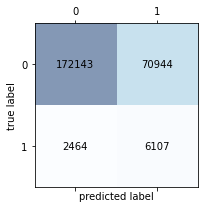

              precision    recall  f1-score   support

           0       0.99      0.71      0.82    243087
           1       0.08      0.71      0.14      8571

    accuracy                           0.71    251658
   macro avg       0.53      0.71      0.48    251658
weighted avg       0.96      0.71      0.80    251658



In [144]:
y_pred = lr.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

Esto ya tiene mejor resultado. Ahora ya si estoy prediciendo vuelos cancelados y el recall lo tenemos en 0.71. Seguiremos intentando mejorar este recall y viendo si conseguimos reducir el número de Fasos Positivos

## 7.3.- Regresión Logística con Estrategia: Subsampling en la clase mayoritaria

Lo que haremos es utilizar un algoritmo para reducir la clase mayoritaria. Lo haremos usando un algoritmo que hace similar al k-nearest neighbor para ir seleccionando cuales eliminar. 

In [175]:
counter = Counter(y_train)
print(counter)

Counter({0: 567089, 1: 20111})


In [176]:
nm = NearMiss()

In [177]:
X_train_res, y_train_res = nm.fit_sample(X_train, y_train)
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution after resampling Counter({0: 20111, 1: 20111})


Aquí se ve que han bajado mucho las muestras de la clase mayoritaria hasta igualar la minoritaria. El problema es que estamos perdiendo información y quizás sea información relevante para el modelo

Como el dataset ha cambiado vuevlo a calcular el mejor parámetro para C con GridSearch. He aumentado el número de iteraciones ya que no convergía

best mean cross-validation score: 0.704
best parameters: {'C': 100}
test-set score: 0.42


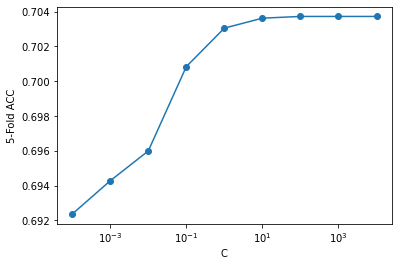

In [178]:
vectorC = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False, max_iter=5000), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

In [179]:
#Realizo el entrenamiento con el valor C
C_optimo = grid.best_params_['C']
lr = LogisticRegression(C = C_optimo, max_iter=5000).fit(X_train_res,y_train_res)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(lr.score(X_train_res, y_train_res)))
print("Test set score acc test: {:.2f}".format(lr.score(X_test, y_test)))

Training set score acc train: 0.71
Test set score acc test: 0.31


No parece que de muy buen resultado. Miraremos de todas maneras la matriz de confusión

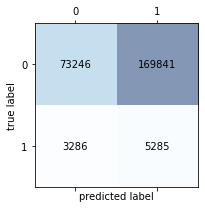

              precision    recall  f1-score   support

           0       0.96      0.30      0.46    243087
           1       0.03      0.62      0.06      8571

    accuracy                           0.31    251658
   macro avg       0.49      0.46      0.26    251658
weighted avg       0.93      0.31      0.44    251658



In [180]:
y_pred = lr.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

Tenemos un recall de 0.62. Vemos que somos capaces de identificar la clase minoritaria, seguimos teneindo muchos falsos positivos. Se ha reducido los TN que antes los predeciamos mejor. Esta no parece muy buena opción, así que sigo quedando con la primera estrategía

## 7.4.- Regresión Logística con Estrategia: Oversampling de la clase minoritaria

Esto el problema que va a tener es que vamos subir la clase minoritaria hasta los 567089 y voy a tener un dataset demasiado grande. El tiempo de computación va a aumentar muchísimo. De momento lo voy a dejar.
Voy a poner el código necesario pero no lo voy a ejecutar

In [183]:
os =  RandomOverSampler()

In [184]:
counter = Counter(y_train)
print(counter)

Counter({0: 567089, 1: 20111})


In [ ]:
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
print ("Distribution after resampling {}".format(Counter(y_train_res)))

In [ ]:
vectorC = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False, max_iter=5000), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

In [ ]:
#Realizo el entrenamiento con el valor C
C_optimo = grid.best_params_['C']
lr = LogisticRegression(C = C_optimo, max_iter=5000).fit(X_train_res,y_train_res)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(lr.score(X_train_res, y_train_res)))
print("Test set score acc test: {:.2f}".format(lr.score(X_test, y_test)))

In [ ]:
y_pred = lr.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

## 7.5.- Regresión Logística con Estrategia: Combinamos resampling con Smote-Tomek

Ahora probaremos una técnica muy usada que consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset. En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).

Antes vimos que el dataset estaba bastante descompensado. Voy a aplicar la ténica oversampling y undersampling.
Vamos a haer un oversampling de la clase minoritaria para que tenga por ejemplo un 10% de la clase mayoritaria. Después usaré random underampling para reducir el número de ejemplos de la clase mayoritaria y que tenga un 50% más que la minoritaria

In [187]:
#Esta es una opción pero tarda mucho
#os_us = SMOTETomek()
#X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
 
#print ("Distribution before resampling {}".format(Counter(y_train)))
#print ("Distribution after resampling {}".format(Counter(y_train_res)))
#model = run_model(X_train_res, X_test, y_train_res, y_test)
#pred_y = model.predict(X_test)
#mostrar_resultados(y_test, pred_y)


In [9]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transformo el dataset
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_res)


NameError: name 'counter_res' is not defined

In [10]:
print(counter)

Counter({0: 113416, 1: 56708})


In [ ]:
Vemos que tenemos menos muestras de clase mayoritaria y más de la minoritaria

best mean cross-validation score: 0.655
best parameters: {'C': 0.0001}
test-set score: 0.58


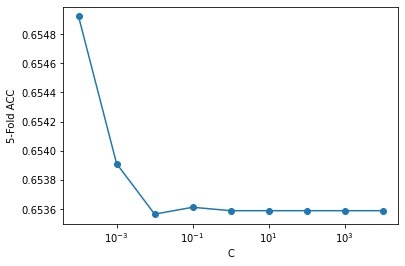

In [11]:
vectorC = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False, max_iter=5000), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

In [13]:
#Realizo el entrenamiento con el valor C
C_optimo = grid.best_params_['C']
lr = LogisticRegression(C = C_optimo, max_iter=5000).fit(X_train_res,y_train_res)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(lr.score(X_train_res, y_train_res)))
print("Test set score acc test: {:.2f}".format(lr.score(X_test, y_test)))

Training set score acc train: 0.73
Test set score acc test: 0.88


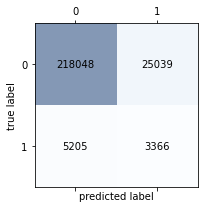

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    243087
           1       0.12      0.39      0.18      8571

    accuracy                           0.88    251658
   macro avg       0.55      0.64      0.56    251658
weighted avg       0.95      0.88      0.91    251658



In [16]:
y_pred = lr.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

Consigo un recall de 0.39.

**Me voy a quedar con la opción de utilizar el parámetro class_weight="balanced"  y la estrategía
Penalización para compensar**

El objetivo ahora es utlizar probar con otros modelos pero usando esta misma estrategía con la idea de conseguir mejorar el Recall que tenemos del 0.71 y mejorar los falsos positivos

In [ ]:
aaaa

## 7.6.- K-NN

Knn no nos ofrece el parámetro class_weight="balanced por lo que lo entrenaré con la estretegía Subsampling
Utilizaré GridSearchCV para encontrar en número óptimo de vecinos


In [9]:
nm = NearMiss()
X_train_res, y_train_res = nm.fit_sample(X_train, y_train)
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution after resampling Counter({0: 20111, 1: 20111})


best mean cross-validation score: 0.728
best parameters: {'n_neighbors': 15}


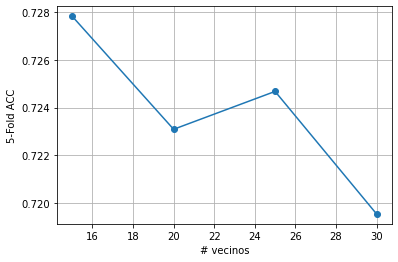

In [15]:
valores = [15, 20, 25, 30]
param_grid = {'n_neighbors': valores}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(valores,scores,'-o')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

In [11]:
#Realizo el entrenamiento con el valor óptimo de vecinos
n_neighbors_optimo = grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n_neighbors_optimo).fit(X_train_res,y_train_res)

#Resultados de train y de test

print("Training set score acc train: {:.2f}".format(knn.score(X_train_res, y_train_res)))
print("Training set score acc test: {:.2f}".format(knn.score(X_test, y_test)))

Training set score acc train: 0.78
Training set score acc test: 0.34


In [129]:
#Guardo el modelo
with open("knn5.pickle", "wb") as file:
    pickle.dump(knn, file)

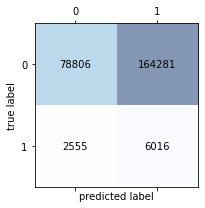

              precision    recall  f1-score   support

           0       0.97      0.32      0.49    243087
           1       0.04      0.70      0.07      8571

    accuracy                           0.34    251658
   macro avg       0.50      0.51      0.28    251658
weighted avg       0.94      0.34      0.47    251658



In [14]:
#Matriz de confusión
y_pred = knn.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))



El Recall es de 0.70 pero el número de falsos positivos es mayor que el que obteníamos con la regresión lineal

## 7.7.- Árbol de decisión individual. Estrategia de balanceo

Pruebo ahora con un árbol de decisión. Utilizo GridSearch para encontrar la profundidad óptima

best mean cross-validation score: 0.919
best parameters: {'max_depth': 24}


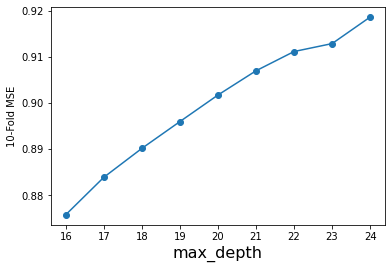

In [41]:
maxDepth = range(16,25)
#He probado antes de 8 a 20 y me ha dado el mejor 19
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0, class_weight="balanced"), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [42]:
#Realizo el entrenamiento con el valor óptimo
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo, class_weight="balanced").fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))

Score Train:  0.943683583106267
Score Test:  0.9195614683419562


In [139]:
#Guardo el modelo
with open("treemodel.pickle", "wb") as file:
    pickle.dump(treeModel, file)

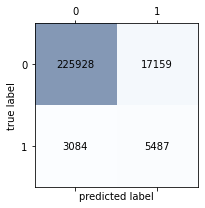

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    243087
           1       0.24      0.64      0.35      8571

    accuracy                           0.92    251658
   macro avg       0.61      0.78      0.65    251658
weighted avg       0.96      0.92      0.94    251658



In [43]:
#Matriz de confusión
y_pred = treeModel.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

No es un mal resultado ya que aunque el Recall ha bajado de 0.71 a 0.64, el número de fasos positivos ha disminuido bastante
Hay incluso margen para seguir aumentando la profundidad


In [19]:
features = X_train.columns


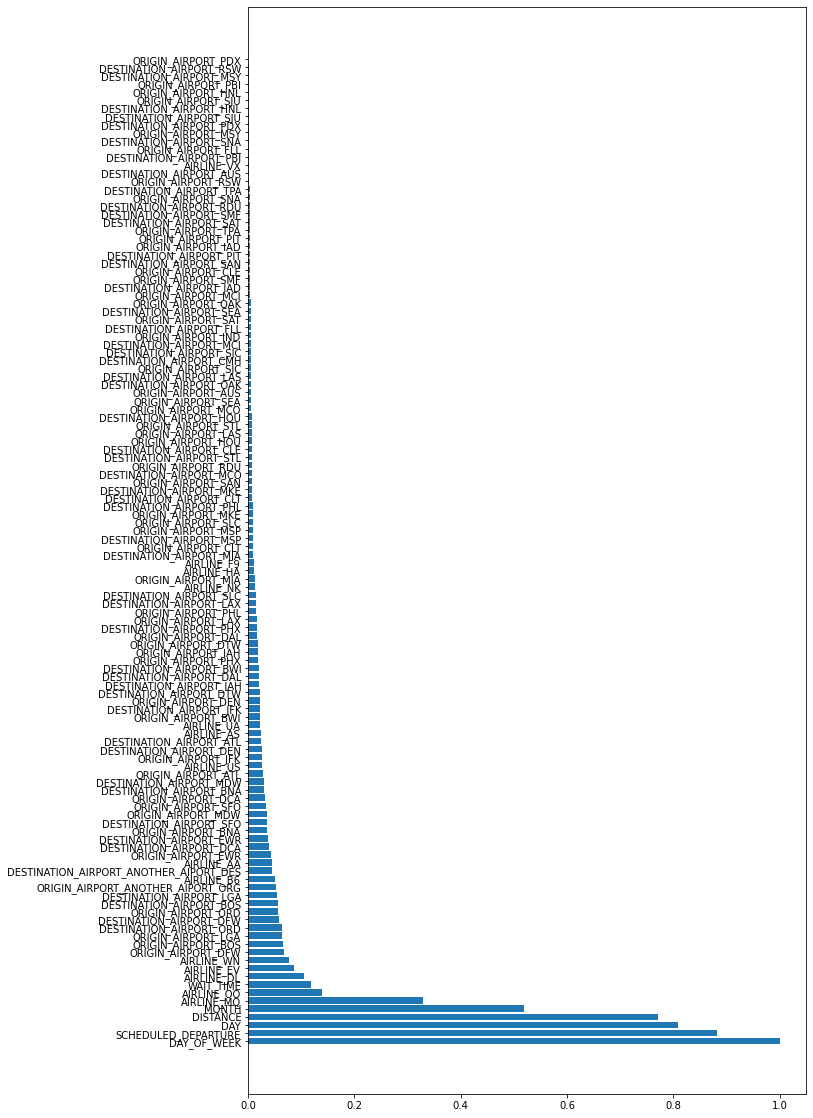

In [45]:
#veamos las características más relevantes
importances1 = treeModel.feature_importances_
importances1 = importances1 / np.max(importances1)

indices = np.argsort(importances1)[::-1]

plt.figure(figsize=(10,20))
plt.barh(range(X_train.shape[1]),importances1[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

La característica más relevante es "DAY OF WEEK" seguido de "SCHEDULED_DEPARTURE"

## 7.8.- Random Forest

Pruebo ahora con un random forest. Utilizo GridSearch para encontrar la profundidad óptima

best mean cross-validation score: 0.954
best parameters: {'max_depth': 27}


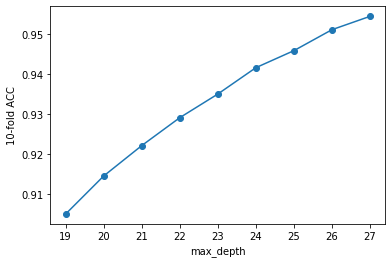

In [14]:
maxDepth = range (19,28)
#He probado antes de 6 a 20 y me ha dado 19, por lo que aumento
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, class_weight="balanced", n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [15]:
#Entreno con el valor óptimo
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,class_weight="balanced",n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.9712142370572208
Score Test:  0.9536116475534256


In [16]:
#Guardo el modelo
with open("randomforest.pickle", "wb") as file:
    pickle.dump(bagModel, file)

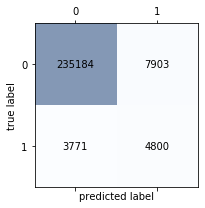

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    243087
           1       0.38      0.56      0.45      8571

    accuracy                           0.95    251658
   macro avg       0.68      0.76      0.71    251658
weighted avg       0.96      0.95      0.96    251658



In [17]:
#Matriz de confusión
y_pred = bagModel.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

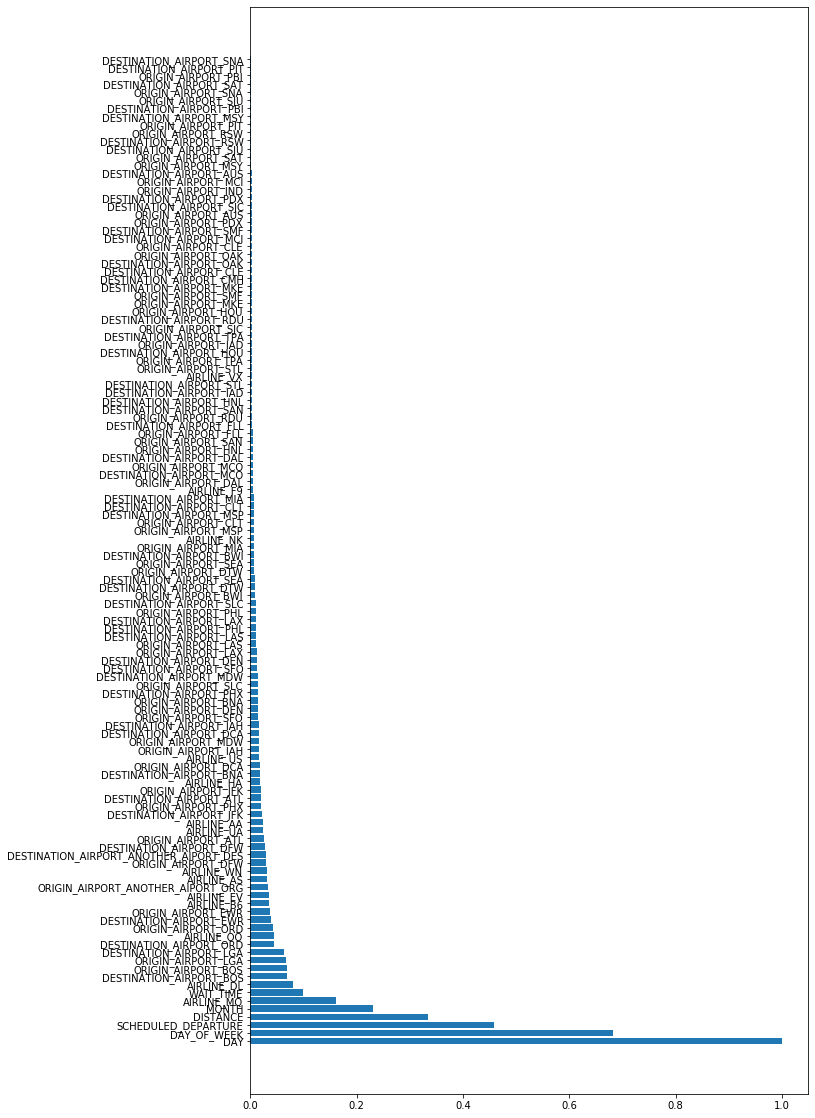

In [20]:
#veamos las características más relevantes
importances1 = bagModel.feature_importances_
importances1 = importances1 / np.max(importances1)

indices = np.argsort(importances1)[::-1]

plt.figure(figsize=(10,20))
plt.barh(range(X_train.shape[1]),importances1[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

## 7.9.- Gradiente Boosted Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [500,1000] #se puede probr a aumentar los estimadores
learningRate = [0.5,0.1]


# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=20), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
NOTA: Determinar la profundidad

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [500,1000,1500,2000] #se puede probr a aumentar los estimadores
learningRate = [0.5,0.1,0.05,0.01]


# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=20), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

KeyboardInterrupt: 

In [ ]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingClassifier(random_state=0, max_depth=20,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
#Matriz de confusión
y_pred = bt.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

## 7.10.- SVC

In [ ]:
array_C = np.logspace(-3, 3, 10)
array_gamma = np.logspace(-5, 1, 10)

param_grid = {'C': array_C, 'gamma':array_gamma}

grid = GridSearchCV(SVC(kernel='rbf'), scoring='accuracy', param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(array_C),len(array_gamma))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.76)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(array_gamma)), np.log10(array_gamma), rotation=90)
plt.yticks(np.arange(len(array_C)), np.log10(array_C))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel3 = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(X_train,y_train)

print('Acc (TRAIN): %0.2f'%svmModel3.score(X_train,y_train))
print('Acc (TEST): %0.2f'%svmModel3.score(X_test,y_test))

In [ ]:
#Matriz de confusión
y_pred = bt.predict (X_test)
y_test = np.array(list(y_test))
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

## 8.- Modelado con algoritmos de Deep Learning

## 8.1. Modelo 1: Red neuronal con 3 capas
Voy a comenzar con una red neuronal de 3 capas. Utilizaré 3 capas densas, una fución de activación de tipo relu y para la salida utilizaré una función sigmoid al ser un problema de clasificación. La función de pérdidas será la "binary_crossentropy'. Utilizaré además como optimizador adam con su lr por defecto

In [12]:
#Creo el modelo
modelo = models.Sequential()
modelo.add (layers.Dense (256, input_shape=(X_train.shape[1],), activation='relu'))
modelo.add(layers.Dense(256, activation='relu'))
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dense(1, activation='sigmoid'))

#Compilo el modelo 
modelo.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

print(modelo.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               31488     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 130,305
Trainable params: 130,305
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
modelo.fit (X_train, y_train, validation_split=0.2,
           epochs=14,
           batch_size=256)

Train on 469760 samples, validate on 117440 samples
Epoch 1/14
469760/469760 [==============================] - 17s 36us/step - loss: 0.1228 - accuracy: 0.9664 - val_loss: 0.1064 - val_accuracy: 0.9689
Epoch 2/14
469760/469760 [==============================] - 17s 37us/step - loss: 0.0987 - accuracy: 0.9708 - val_loss: 0.0997 - val_accuracy: 0.9709
Epoch 3/14
469760/469760 [==============================] - 17s 36us/step - loss: 0.0899 - accuracy: 0.9732 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 4/14
469760/469760 [==============================] - 17s 37us/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0904 - val_accuracy: 0.9734
Epoch 5/14
469760/469760 [==============================] - 17s 36us/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0873 - val_accuracy: 0.9742
Epoch 6/14
469760/469760 [==============================] - 17s 37us/step - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 7/14
469760/469760 [======================

In [16]:
score_basic=modelo.evaluate(X_test, y_test, batch_size=256)
score_basic
#score_basictrain=modelo.evaluate(X_train, y_train, batch_size=16)
#score_basictest=modelo.evaluate(X_test, y_test, batch_size=16)
#print('Acc (TRAIN): %0.2f'%score_basictrain)
#print('Acc (TEST): %0.2f'%score_basictest)


251658/251658 [==============================] - 3s 11us/step


[0.08765690998428943, 0.9745011329650879]

In [19]:
#Función para transformar y_pred y que tenga solo valores a 0 ó 1
def Transforma_y_pred (y_pred):
    for lin in range (len(y_pred)):
        if y_pred[lin] < 0.5:
            y_pred[lin] = 0
        else:           
            y_pred[lin] = 1
    return y_pred 

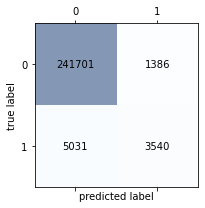

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    243087
           1       0.72      0.41      0.52      8571

    accuracy                           0.97    251658
   macro avg       0.85      0.70      0.76    251658
weighted avg       0.97      0.97      0.97    251658



In [20]:
#Calculamos la predicción
y_pred = modelo.predict(X_test)
y_pred = y_pred = Transforma_y_pred (y_pred)
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_pred))

## Conclusión: 

- Radom Forest:  Accuracy: 0,95 -- Recall (1) 0,56 -- Precision (1): 0,38 --- F1 (1) 0,42
- **Red Neuronal con 3 capas:  Accuracy: 0,97 --- Recall (1): 0.41 ---- Precision(1): 0,72 --- F1 (0,52)**
                
A la vista de estos resultados me quedaría con la red neuronal de 3 capas                

## 9.- Predicción

A continuación leo el fichero de vuelos para predecir y aplico todas las transformaciones necesarias

In [152]:
vuelos = pd.read_csv('./data/pred_flights.csv', sep =',', decimal='.', header=None) # cargamos fichero
print(f"El dataset original contiene {len(vuelos)} vuelos con {len(vuelos.columns)} características")
#pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
vuelos.head(5) 

El dataset original contiene 209717 vuelos con 13 características


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
1,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
2,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
3,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
4,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920


In [153]:
vuelos.columns = ["YEAR","MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","TAIL_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","SCHEDULED_DEPARTURE","SCHEDULED_TIME","DISTANCE","SCHEDULED_ARRIVAL"]

In [154]:
vuelos.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
1,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
2,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
3,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
4,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920


In [155]:
caracteristicas_para_borrar = ['FLIGHT_NUMBER','TAIL_NUMBER']
vuelos.drop (caracteristicas_para_borrar, axis=1, inplace=True)



vuelos['YEAR'] = pd.to_numeric(vuelos['YEAR'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['YEAR'], inplace=True) 
vuelos.drop (['YEAR'], axis=1, inplace=True)

vuelos['MONTH'] = pd.to_numeric(vuelos['MONTH'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['MONTH'], inplace=True) 


vuelos['DAY'] = pd.to_numeric(vuelos['DAY'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['DAY'], inplace=True) 


vuelos['DAY_OF_WEEK'] = pd.to_numeric(vuelos['DAY_OF_WEEK'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['DAY_OF_WEEK'], inplace=True) 

#Elimino nulos si los hubiera
vuelos.dropna(subset=['AIRLINE'], inplace=True) 

#Elimino nulos si los hubiera
vuelos.dropna(subset=['ORIGIN_AIRPORT'], inplace=True) 
vuelos ['ORIGIN_AIRPORT'] [~vuelos ['ORIGIN_AIRPORT'].isin(aeropuertos_origen_frecuentes)]='ANOTHER_AIPORT_ORG'

#Elimino nulos si los hubiera
vuelos.dropna(subset=['DESTINATION_AIRPORT'], inplace=True)
vuelos ['DESTINATION_AIRPORT'] [~vuelos ['DESTINATION_AIRPORT'].isin(aeropuertos_destino_frecuentes)]='ANOTHER_AIPORT_DES'

vuelos['SCHEDULED_DEPARTURE'] = pd.to_numeric(vuelos['SCHEDULED_DEPARTURE']) 
#Elimino nulos si los hubiera
vuelos.dropna(subset=['SCHEDULED_DEPARTURE'], inplace=True) 


vuelos['SCHEDULED_TIME'] = pd.to_numeric(vuelos['SCHEDULED_TIME']) 
vuelos['SCHEDULED_TIME'] = vuelos['SCHEDULED_TIME'].astype(float)

vuelos['SCHEDULED_TIME'].fillna(mediana_scheduled_time, inplace=True)

vuelos['DISTANCE'] = pd.to_numeric(vuelos['DISTANCE'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['DISTANCE'], inplace=True) 


vuelos['SCHEDULED_ARRIVAL'] = pd.to_numeric(vuelos['SCHEDULED_ARRIVAL'])
#Elimino nulos si los hubiera
vuelos.dropna(subset=['SCHEDULED_ARRIVAL'], inplace=True) 

vuelos ['WAIT_TIME'] = vuelos.apply(lambda x: calculo_tiempo_espera(x.SCHEDULED_DEPARTURE, x.SCHEDULED_ARRIVAL, x.SCHEDULED_TIME), axis=1)


#Codificación de variable categóricas
transformed_vuelos_df = pd.get_dummies(vuelos)

#Correlaciones
to_drop = ['SCHEDULED_TIME', 'SCHEDULED_ARRIVAL']
transformed_vuelos_df.drop(to_drop, axis=1, inplace=True)


#Transformación logarítmica

transformed_vuelos_df ['DISTANCE'] = transformed_vuelos_df ['DISTANCE'].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
transformed_vuelos_df ['DISTANCE'] = np.log(transformed_vuelos_df ['DISTANCE'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [163]:
transformed_vuelos_train_df = transformed_vuelos_train_df.drop('CANCELLED', axis=1)
missing_cols = set (transformed_vuelos_train_df.columns) - set (transformed_vuelos_df.columns)
#Caso de que que en test no tenga las mismas columnas las añado con valor 0
for c in missing_cols:
    transformed_vuelos_df [c]=0
#Me aseguro que el orden de las columnas en test sea el mismo que en train
transformed_vuelos_df = transformed_vuelos_df [transformed_vuelos_train_df.columns]

In [164]:
transformed_vuelos_df.head(5)

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DISTANCE,WAIT_TIME,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ANOTHER_AIPORT_ORG,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_MKE,ORIGIN_AIRPORT_MSP,ORIGIN_AIRPORT_MSY,ORIGIN_AIRPORT_OAK,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_PBI,ORIGIN_AIRPORT_PDX,ORIGIN_AIRPORT_PHL,ORIGIN_AIRPORT_PHX,ORIGIN_AIRPORT_PIT,ORIGIN_AIRPORT_RDU,ORIGIN_AIRPORT_RSW,ORIGIN_AIRPORT_SAN,ORIGIN_AIRPORT_SAT,ORIGIN_AIRPORT_SEA,ORIGIN_AIRPORT_SFO,ORIGIN_AIRPORT_SJC,ORIGIN_AIRPORT_SJU,ORIGIN_AIRPORT_SLC,ORIGIN_AIRPORT_SMF,ORIGIN_AIRPORT_SNA,ORIGIN_AIRPORT_STL,ORIGIN_AIRPORT_TPA,DESTINATION_AIRPORT_ANOTHER_AIPORT_DES,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_AUS,DESTINATION_AIRPORT_BNA,DESTINATION_AIRPORT_BOS,DESTINATION_AIRPORT_BWI,DESTINATION_AIRPORT_CLE,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_CMH,DESTINATION_AIRPORT_DAL,DESTINATION_AIRPORT_DCA,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_DTW,DESTINATION_AIRPORT_EWR,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_HNL,DESTINATION_AIRPORT_HOU,DESTINATION_AIRPORT_IAD,DESTINATION_AIRPORT_IAH,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCI,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_MDW,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_MKE,DESTINATION_AIRPORT_MSP,DESTINATION_AIRPORT_MSY,DESTINATION_AIRPORT_OAK,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_PBI,DESTINATION_AIRPORT_PDX,DESTINATION_AIRPORT_PHL,DESTINATION_AIRPORT_PHX,DESTINATION_AIRPORT_PIT,DESTINATION_AIRPORT_RDU,DESTINATION_AIRPORT_RSW,DESTINATION_AIRPORT_SAN,DESTINATION_AIRPORT_SAT,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SJU,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA
0,2,25,3,700,5.541264,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,25,3,700,5.843544,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,25,3,700,5.983936,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,25,3,700,7.753194,180.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,25,3,700,5.913503,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
# debo aplicar el mismo scaling al conjungo que el calculado para train
vuelos = scaler.transform(transformed_vuelos_df)



Aplico el modelo de redes neuronales de 3 capas para realizar la predicción

In [168]:
y_pred = modelo.predict(vuelos)
#Para tener el resultado como 0 o 1
y_pred = Transforma_y_pred (y_pred)

In [174]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [175]:
y_pred = y_pred.astype(int)

In [179]:
np.savetxt("./data/resultado.txt", y_pred, fmt='%1u')

In [4]:
f = open('./data/resultado.txt', "r")
print(f.read())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
